#World cup 2018 prediction-Exploratory Data Analysis(Group 3)



In [1]:
# load different libraries useful for our work

import numpy as np
import pandas as pd
import statsmodels.api as sm
import requests
import math
from statsmodels.api import OLS
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import AdaBoostClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import KFold
from sklearn.pipeline import make_pipeline
from sklearn.datasets import make_blobs
from io import BytesIO
from pandas.plotting import scatter_matrix
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
from scipy.special import gamma
from bs4 import BeautifulSoup
import bs4 as bs
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import datetime
from dateutil import relativedelta as rdelta
import seaborn as sns
sns.set()
from IPython.display import display
from scipy.stats import norm
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Reshape
from keras.optimizers import SGD

/usr/local/lib/python3.6/dist-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
Using TensorFlow backend.


#WC 2018 Participating teams and players data to be used throughout  our work<a id ='Teamdanalysis'></a> 

In [2]:
# https://en.wikipedia.org/wiki/2018_FIFA_World_Cup_squads
# scrape the squad of every nation selected to the world cup with their data and get a list of all the countries from wikipedia

my_page=requests.get("https://en.wikipedia.org/wiki/2018_FIFA_World_Cup_squads")

#Page for Champions leage Team 2017 - 2018
champions_league_page = requests.get("https://en.wikipedia.org/wiki/2017%E2%80%9318_UEFA_Champions_League_group_stage")

squad_soup = BeautifulSoup(my_page.text, "html.parser")
CL_soup = BeautifulSoup(champions_league_page.text, "html.parser") # Parse the champions league page

#GET the list of teams for CHampions LEague 2017-2018
CL_list = []
#find top_node of the teams
top_node = CL_soup.find("th", attrs={"width": "200"})

next_link = top_node.find_next('a')  # get the first link in the node
for i in range(78):  # getting through the next 78 links 
    next_link = next_link.find_next('a')  # retrieve the next link
    CL_team = next_link.text.strip('\n')  # Strip all junk character
    if CL_team and '[' not in CL_team:  # Condition to make sure that the link is an actual team 
        CL_list.append(CL_team)  # Add the team to the champions league team 

        
cup_date = datetime.datetime(2018, 7, 1, 0, 0, 0)
country_tables = squad_soup.findAll("table", attrs={"class": "sortable wikitable plainrowheaders"})
starlist = []
countrylist = []
top_league_country = ['France', 'Italy', 'Germany', 'England', 'Spain']   #List of top 5 Soccer League in the World


for country_table in country_tables:
    players = country_table.findAll("th", attrs={"scope": "row"})
        
    for name in players:
        d = dict()
        d['name'] = name.find('a').text.strip('\n')
        pos = name.find_previous_sibling()
        d['pos'] = pos.find('a').text.strip('\n').strip('()')
        rawbday = name.find_next_sibling()
        bday = datetime.datetime.strptime(rawbday.find('span',attrs={'class':'bday'}).text.strip('\n'), '%Y-%m-%d')
        age = rdelta.relativedelta(cup_date,bday).years
        
        d['age'] = age
        caps = rawbday.find_next_sibling()
        d['caps'] = caps.text.strip('\n')
        goals = caps.find_next_sibling()
        d['goals'] = goals.text.strip('\n')
        country = goals.find_previous('h3').find('span').text.strip('\n')
        club = goals.find_next('a').find_next('a').text.strip('\n')   # Retrieve the club information of the player
        if caps.find_next('a')['title'] in top_league_country:  #Check if the Club is in Top5 leagues
            top_league = 1  # If yes, CLub in Top 5 league 
        else: 
            top_league = 0  # Club isn't in top 5 league
        d['country'] = country
        d['club'] = club  # Add the club Name of the player in the DataFrame
        d['Top League'] = top_league # Add the player in Top 5 League or Not. 
        
        if club in CL_list:  # Check if the club played champions league
            CL_league = 1
        else: 
            CL_league = 0
        d['CL League 2017-2018'] = CL_league # add Champions league 2017/2018 to the data frame
        starlist.append(d)

    countrylist.append(country)
print(starlist)
print(countrylist)



[{'name': 'Essam El-Hadary', 'pos': 'GK', 'age': 45, 'caps': '158', 'goals': '0', 'country': 'Egypt', 'club': 'Al-Taawoun', 'Top League': 0, 'CL League 2017-2018': 0}, {'name': 'Ali Gabr', 'pos': 'DF', 'age': 29, 'caps': '21', 'goals': '1', 'country': 'Egypt', 'club': 'West Bromwich Albion', 'Top League': 1, 'CL League 2017-2018': 0}, {'name': 'Ahmed Elmohamady', 'pos': 'DF', 'age': 30, 'caps': '78', 'goals': '2', 'country': 'Egypt', 'club': 'Aston Villa', 'Top League': 1, 'CL League 2017-2018': 0}, {'name': 'Omar Gaber', 'pos': 'MF', 'age': 26, 'caps': '24', 'goals': '0', 'country': 'Egypt', 'club': 'Los Angeles FC', 'Top League': 0, 'CL League 2017-2018': 0}, {'name': 'Sam Morsy', 'pos': 'MF', 'age': 26, 'caps': '5', 'goals': '0', 'country': 'Egypt', 'club': 'Wigan Athletic', 'Top League': 1, 'CL League 2017-2018': 0}, {'name': 'Ahmed Hegazi', 'pos': 'DF', 'age': 27, 'caps': '45', 'goals': '1', 'country': 'Egypt', 'club': 'West Bromwich Albion', 'Top League': 1, 'CL League 2017-2018'

In [6]:
# put the squad data and nations participating on a data frame to use in later analysis

# players squads in details and their respective information
df_players = pd.DataFrame(starlist)
display(df_players.head())

# All the national teams participating in the world cup- used frequently throughout our worl
df_countries = pd.DataFrame(countrylist,columns = ['Nations Participating'])
# display(df_countries.head())

cup2018_players = df_players['name']

list_of_players=df_players['name']

,CL League 2017-2018,Top League,age,caps,club,country,goals,name,pos
0,0,0,45,158,Al-Taawoun,Egypt,0,Essam El-Hadary,GK
1,0,1,29,21,West Bromwich Albion,Egypt,1,Ali Gabr,DF
2,0,1,30,78,Aston Villa,Egypt,2,Ahmed Elmohamady,DF
3,0,0,26,24,Los Angeles FC,Egypt,0,Omar Gaber,MF
4,0,1,26,5,Wigan Athletic,Egypt,0,Sam Morsy,MF


#Squad data averaged and summed

In [22]:
# make a pivot table of the averages of all the squads  ages caps and goals and sum the other columns
df_players['caps'] = pd.to_numeric(df_players['caps'])
df_players['goals'] = pd.to_numeric(df_players['goals'])
players_features = pd.pivot_table(df_players,index='country',values=['age','caps','Top League','CL League 2017-2018','goals'], aggfunc={'age':'mean','caps':'mean','Top League':'sum','CL League 2017-2018':'sum','goals':'sum'}) # 'Top League'
players_features['country']=players_features.index
players_features

,CL League 2017-2018,Top League,age,caps,goals,country
country,,,,,,
Argentina,14,14,29.130435,37.347826,172,Argentina
Australia,2,9,27.608696,29.826087,121,Australia
Belgium,17,19,27.217391,47.260870,156,Belgium
Brazil,18,17,28.130435,29.869565,127,Brazil
Colombia,6,13,27.913043,31.000000,91,Colombia
Costa Rica,3,6,29.434783,51.347826,115,Costa Rica
Croatia,8,16,27.478261,40.304348,116,Croatia
Denmark,5,17,26.739130,26.565217,65,Denmark
Egypt,1,7,28.521739,37.304348,64,Egypt


#X and Y train Dataset-Cleaning preparation and creation



In [23]:
# wolrdcup1 fifa international results
response = requests.get('https://drive.google.com/uc?export=download&id=1p9aepCMiZWyA9eQYuUl3gDV51kYVqMDj')
df = pd.read_csv(BytesIO(response.content))
df.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [24]:
print(df.shape)
df=df.drop(["city"],axis=1)

(39638, 9)


In [25]:
df.describe()

,home_score,away_score
count,39638.000000,39638.000000
mean,1.748221,1.187749
std,1.747294,1.400002
min,0.000000,0.000000
25%,1.000000,0.000000
50%,1.000000,1.000000
75%,2.000000,2.000000
max,31.000000,21.000000


In [26]:

# Add winnning team column and goal difference
winner=[]
for i in range(len(df['home_team'])):
  if df['home_score'][i] > df['away_score'][i]:
    winner.append(df['home_team'][i])
  elif df['home_score'][i] < df['away_score'][i]:
    winner.append(df['away_team'][i])
  else:
    winner.append('Draw')
df['winning_team']=winner
df['goal_difference']=np.absolute(df['home_score']-df['away_score'])
df.head()


,date,home_team,away_team,home_score,away_score,tournament,country,neutral,winning_team,goal_difference
0,1872-11-30,Scotland,England,0,0,Friendly,Scotland,False,Draw,0
1,1873-03-08,England,Scotland,4,2,Friendly,England,False,England,2
2,1874-03-07,Scotland,England,2,1,Friendly,Scotland,False,Scotland,1
3,1875-03-06,England,Scotland,2,2,Friendly,England,False,Draw,0
4,1876-03-04,Scotland,England,3,0,Friendly,Scotland,False,Scotland,3


In [27]:
# get all historical matches of the countries participating in 2018 world cup

df_natteam_home=df[df['home_team'].isin(countrylist)]
df_natteam_away=df[df['away_team'].isin(countrylist)]
df=pd.concat((df_natteam_home,df_natteam_away))
# df.drop_duplicates()
display(df.shape)
df.head()

(20375, 10)

,date,home_team,away_team,home_score,away_score,tournament,country,neutral,winning_team,goal_difference
1,1873-03-08,England,Scotland,4,2,Friendly,England,False,England,2
3,1875-03-06,England,Scotland,2,2,Friendly,England,False,Draw,0
6,1877-03-03,England,Scotland,1,3,Friendly,England,False,Scotland,2
10,1879-01-18,England,Wales,2,1,Friendly,England,False,England,1
11,1879-04-05,England,Scotland,5,4,Friendly,England,False,England,1


In [28]:
# get all international matches of the teams of the world cup since 1990
year=[]
for n in df['date']:
  year.append(int(n[:4]))
df['match_year']=year

display(df.head())


,date,home_team,away_team,home_score,away_score,tournament,country,neutral,winning_team,goal_difference,match_year
1,1873-03-08,England,Scotland,4,2,Friendly,England,False,England,2,1873
3,1875-03-06,England,Scotland,2,2,Friendly,England,False,Draw,0,1875
6,1877-03-03,England,Scotland,1,3,Friendly,England,False,Scotland,2,1877
10,1879-01-18,England,Wales,2,1,Friendly,England,False,England,1,1879
11,1879-04-05,England,Scotland,5,4,Friendly,England,False,England,1,1879


In [29]:
df.shape

(20375, 11)

In [30]:
df=df[df.match_year>=1990]
display(df.head())
display(df.shape)

,date,home_team,away_team,home_score,away_score,tournament,country,neutral,winning_team,goal_difference,match_year
15795,1990-01-17,Mexico,Argentina,2,0,Friendly,USA,True,Mexico,2,1990
15802,1990-01-24,France,German DR,3,0,Friendly,Kuwait,True,France,3,1990
15804,1990-01-25,Nigeria,Ivory Coast,2,0,Friendly,Nigeria,False,Nigeria,2,1990
15809,1990-01-28,Nigeria,Senegal,1,1,Friendly,Nigeria,False,Draw,0,1990
15811,1990-02-02,Colombia,Uruguay,0,2,Friendly,USA,True,Uruguay,2,1990


(10580, 11)

In [31]:
df_natteam=df[df['home_team'].isin(countrylist)& df['away_team'].isin(countrylist)]
print(df_natteam.shape)
df_natteam.head()

(3564, 11)


,date,home_team,away_team,home_score,away_score,tournament,country,neutral,winning_team,goal_difference,match_year
15795,1990-01-17,Mexico,Argentina,2,0,Friendly,USA,True,Mexico,2,1990
15809,1990-01-28,Nigeria,Senegal,1,1,Friendly,Nigeria,False,Draw,0,1990
15811,1990-02-02,Colombia,Uruguay,0,2,Friendly,USA,True,Uruguay,2,1990
15813,1990-02-02,Iran,Poland,0,2,Friendly,Iran,False,Poland,2,1990
15816,1990-02-04,Costa Rica,Uruguay,0,2,Friendly,USA,True,Uruguay,2,1990


Text(0.5,1,'goal difference in all international matches')

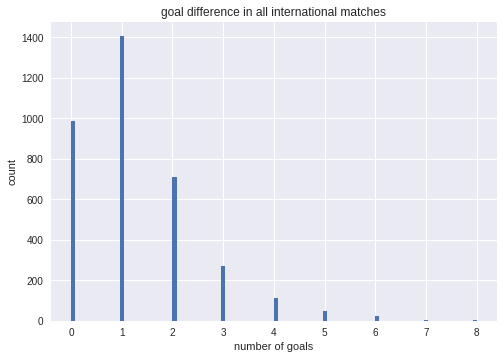

In [32]:
# Show distribution of goal differences in the international matches

# fig, axes = plt.subplots(2, 1)
plt.hist(df_natteam['goal_difference'],bins=100)
plt.xlabel("number of goals")
plt.ylabel("count")
plt.title("goal difference in all international matches")
# df.hist('h_draw',bins=100, ax=axes[0,1])

Text(0.5,0,'Number of matches')

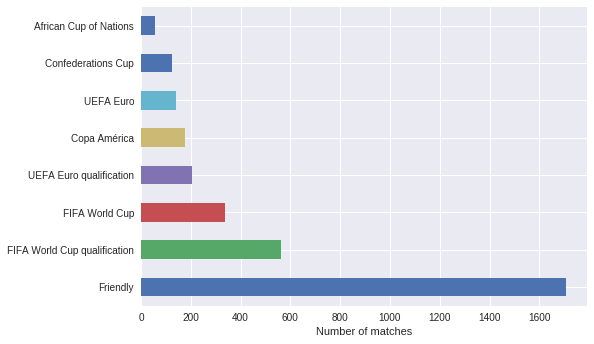

In [33]:
# Show the distribution of the most played international tournaments
df_natteam['tournament'].value_counts()[:8].plot(kind='barh')
plt.xlabel("Number of matches")

Text(0.5,1,'The 10 most successful countries in internataional matches since 1990')

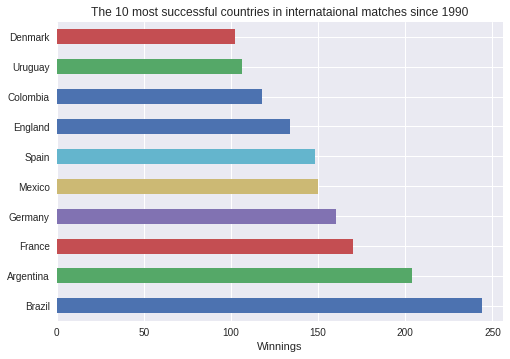

In [34]:
# show the countries with the most wins since 1990 for all these international games
df_natteam['winning_team'].value_counts()[1:11].plot(kind='barh')
plt.xlabel("Winnings")
plt.title("The 10 most successful countries in internataional matches since 1990")


Text(0.5,1,'Performance of Home Team')

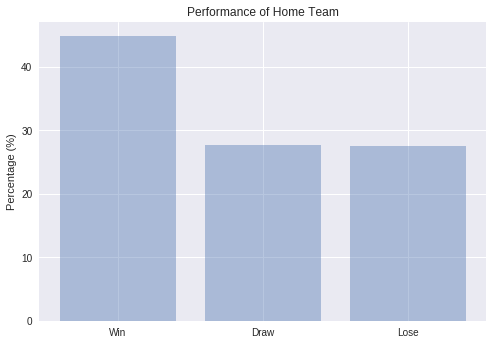

In [35]:
#examine the perfromance of the squads when they play at home
home_win = df_natteam[df_natteam.home_score > df_natteam.away_score]
away_win = df_natteam[df_natteam.home_score < df_natteam.away_score]
draw_df = df_natteam[df_natteam.home_score == df_natteam.away_score]

win=home_win.shape[0]/df_natteam.shape[0]*100
draw=draw_df.shape[0]/df_natteam.shape[0]*100
lose=(df_natteam.shape[0]-home_win.shape[0]-draw_df.shape[0])/df_natteam.shape[0]*100


objects = ('Win', 'Draw', 'Lose')
y_pos = np.arange(len(objects))
performance = [win,draw,lose]
plt.bar(y_pos, performance, align='center', alpha=0.4)
plt.xticks(y_pos, objects)
plt.ylabel('Percentage (%)')
plt.title('Performance of Home Team')

### Create train set

In [0]:
# Create x and y train
x_train = df_natteam[['home_team','away_team']]
y_train = df_natteam['winning_team']

# Divide the training set to training and validation set
# x_train, x_val, y_train, y_val = train_test_split(x_train,y_train, test_size=0.3, random_state=99)


### we perform k-fold cross validation to select the best parameters for each model based on some criteria.

#test set

In [0]:
# scrape and create our test set

fifa_page=requests.get("https://fixturedownload.com/results/fifa-world-cup-2018")
ranking_soup = BeautifulSoup(fifa_page.text, "html.parser")
match_table = ranking_soup.find('tbody')
rows_match = match_table.findAll('tr')

home_country = []
score = []
away_country = []
round_number = []
for row in rows_match:
    tds = row.findAll('td')
    
    round_number.append(tds[0].text)
    
    home_country.append(tds[3].text)
    
    away_country.append(tds[4].text)
    
    score.append(tds[6].text)

In [0]:
winner = []
k = 0
for value in score:
    game_result = value.split(' ')
    if int(game_result[0]) > int(game_result[-1]):
        winner.append(home_country[k])
    elif int(game_result[0]) == int(game_result[-1]):
        winner.append('Draw')
    else:
        winner.append(away_country[k])
    k +=1

df_test = pd.DataFrame({'round_number':round_number,'home_team':home_country,'away_team':away_country,'winning_team':winner})
df_test = df_test.replace({"Korea Republic":"South Korea","IR Iran":"Iran"})
df_test['phase'] = (df_test['round_number'] == '1') | (df_test['round_number'] == '2') | (df_test['round_number'] == '3')

phase_1 = df_test[df_test['phase']== True]
phase_2 = df_test[df_test['phase']== False]

# all the phases untill apart of knockout phase
x_test1 = phase_1[['home_team','away_team']]

# only the knockout phase matches
x_test2 = phase_2[['home_team','away_team']]

# all the winning teams untill apart of knockout phase
y_test1 = phase_1['winning_team']

# winning teams of the knockout phase
y_test2 = phase_2['winning_team']

y_test1.head()

0     Russia
1    Uruguay
2       Iran
3       Draw
4     France
Name: winning_team, dtype: object

In [0]:
# the scraped data show a draw when a game is prolonged in the knockout phase to 120min/penalties. This is a solution to get the right winners of the knocout phase:
draws = y_test2 == 'Draw'
idx = y_test2[draws].index.values
for index in idx:
  team1 = x_test2['away_team'].loc[index]
  team2 = x_test2['home_team'].loc[index]
  team1_progress = ((x_test2['away_team'].loc[index+1:]==team1).any() or (x_test2['home_team'].loc[index+1:]==team1).any())
  if team1_progress:
    y_test2.loc[index] = team1
  else:
    y_test2.loc[index] = team2
# winning teams of the knocout phase with the winning teams after 120min/penalties-if occured    
y_test2

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


48     France
49    Uruguay
50     Russia
51    Croatia
52     Brazil
53    Belgium
54     Sweden
55    England
56     France
57    Belgium
58    England
59    Croatia
60     France
61    Croatia
62    Belgium
63     France
Name: winning_team, dtype: object

In [0]:
# do a hack on the knockout phase if there is a draw result
def knockout_test(model,x):
  # condition so that neural network could work also with this function
  if isinstance(model,(Sequential,)):
    ypred = model.predict(x)
  # the rest of the models can use probability
  else:
    ypred = model.predict_proba(x)
    
  winners = np.argmax(ypred,axis=1)
  draw = np.argmax(ypred,axis=1)==0
  # take care of an occurence of a draw predicted result- the hack
  if draw.any():
    draw_winners = np.argmax(ypred[draw,1:])+1
    winners[draw]=draw_winners
  
  return winners


#Feature engineering for our baseline model

###FIFA rankings- the most important feature of our baseline model

In [0]:
# scrape the Fifa rankings from the fifa.com website as of the seventh of june 2018- Just before the world cup started
# https://www.fifa.com/fifa-world-ranking/ranking-table/men/rank/id12210/#all
fifa_page=requests.get("https://www.fifa.com/fifa-world-ranking/ranking-table/men/rank/id12210/#all")

ranking_soup = BeautifulSoup(fifa_page.text, "html.parser")

ranking_table = ranking_soup.findAll("tbody")

ranking_list=[]
        
for rank in ranking_table:
  ranked_countries = rank.findAll('tr')
  
  for c in ranked_countries:
    di = dict()
    
    ranking = c.find('td',attrs={'class':"fi-table__td fi-table__rank"}).text
    di['ranking'] = ranking
    di['country_ranked_06/18']=c.find('a',attrs={'class':"fi-t__link"}).find('span',attrs={'class':"fi-t__nText"}).text
    ranking_list.append(di)
raw_df_ranking = pd.DataFrame(ranking_list)
#south korea and Iran don't apear in the same name in ranking and country list
raw_df_ranking = raw_df_ranking.replace({"Korea Republic":"South Korea","IR Iran":"Iran"})

df_ranking=raw_df_ranking[raw_df_ranking['country_ranked_06/18'].isin(countrylist)]

df_ranking['ranking'] = pd.to_numeric(df_ranking['ranking'])
df_ranking.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,country_ranked_06/18,ranking
0,Germany,1
1,Brazil,2
2,Belgium,3
3,Portugal,4
4,Argentina,5


In [0]:
#get the rankings of only the squads that participated in the 2018 world cup
df_ranking=df_ranking[df_ranking['country_ranked_06/18'].isin(countrylist)]

df_ranking.set_index("country_ranked_06/18")
df_ranking = df_ranking.rename(columns={'country_ranked_06/18': 'country'})
df_ranking.set_index('country')
df_ranking.head()

,country,ranking
0,Germany,1
1,Brazil,2
2,Belgium,3
3,Portugal,4
4,Argentina,5


#### Feature of the last 20 matches performance before the world cup

In [0]:
# get the 20 most recent performance and later make it a predictor
winning_teamlist = df_natteam['winning_team'].unique()

number_wins = []
for team in countrylist:
    index_played = df_natteam[(df_natteam['home_team']==team) | (df_natteam['away_team']==team)][-20:]
    won_games = index_played[index_played['winning_team']==team].shape[0]
    number_wins.append({'country':team,'# won':won_games})

df_wins = pd.DataFrame(number_wins)
df_wins = df_wins.set_index('country')
df_wins['country']=df_wins.index
df_wins.head()

,# won,country
country,,
Egypt,6,Egypt
Russia,5,Russia
Saudi Arabia,2,Saudi Arabia
Uruguay,7,Uruguay
Iran,4,Iran


#### National squad Coach salary feature

In [0]:
# Function to get the Original Country of Coach and his/her age 
import datetime 
import time
now = datetime.datetime.now()  # Import the datetime  library 

def coach_info(url):
    page = requests.get(url)
    soup = BeautifulSoup(page.text, "html.parser")  # Parse the passed URL 
    
    
    nodes = soup.select('div.fi-p__profile-text--uppercase')  # Select the div necessary for scrapping values
    age = now.year - int(nodes[0].find('span').text.strip()[-4:])  # Extract the age of the coach 
    nationality = nodes[1].find('span').text.strip()  # extract the nationality of the coach 
    return (age, nationality)

In [0]:
# Get the list for all coaches for the world cup, their age, original country 


ROOT = "https://www.fifa.com"

coach_page=requests.get("https://www.fifa.com/worldcup/players/coaches/") # Get URL from the coaches list
coach_soup = BeautifulSoup(coach_page.text, "html.parser") # Parse the page.text in Beautiful Soup

salary_page = requests.get("http://www.footballwood.in/salary-every-coach-in-2018-fifa-world-cup.html") # URL to get salary for coaches
salary_soup = BeautifulSoup(salary_page.text, "html.parser")

# Get list of coaches salary and their country 
coach_dict = {}
salary_nodes = salary_soup.findAll('tr')
for i in range(1,len(salary_nodes)):
    pays = salary_nodes[i].findNext('td').findNext('td').findNext('td').text
    if pays == 'Iran': pays = 'IR Iran'
    if pays == 'South Korea': pays = 'Korea Republic'
    salaire = salary_nodes[i].findNext('td').findNext('td').findNext('td').findNext('td').text.strip('£')   
    if salaire[-1] == 'm': 
        salary = float(salaire.strip('m')) * 1000000
    else:
        salary = float(salaire.replace(',', ''))
    coach_dict[pays] = salary
 
    
#ranking_table = ranking_soup.findAll("tbody")

def parse_coach (soup: BeautifulSoup):
    
    coachlist = []  #List to save the coaches
    teamlist = []  #list of save the team
    
    coach_nodes = soup.select('div.fi-p__name')   # Narrow to div containing the coach names
    team_nodes = soup.select('div.fi-p__country') # Narrow to div contaning the coach's team 
    detail_nodes = soup.select('div.col-sm-3')    # Get the href for the Coach information
    for i in range(len(coach_nodes)):
        dictionaire = {}  # dictionaire to save the coach and the team he/she corresponds to
        dictionaire['country'] = team_nodes[i].text.strip() # Get the country name for the coach 
        dictionaire['coach'] = coach_nodes[i].text.strip() # Get the coach corresponding to the country
        dictionaire['coach age'], dictionaire['nationality'] = coach_info(ROOT+detail_nodes[i].find('a').attrs['href']) # Get age and nationality of the coach 
        dictionaire['Coach Salary'] = coach_dict[team_nodes[i].text.strip()]
#         time.sleep(2)
        coachlist.append(dictionaire)
        
    return coachlist

In [0]:
df_coaches = pd.DataFrame(parse_coach(coach_soup))  # Convert coach list into dataframe
df_coaches['country'] = df_coaches.country.replace({"Korea Republic":"South Korea","IR Iran":"Iran"})
df_coaches.head()

,Coach Salary,coach,coach age,country,nationality
0,235600.0,Adam NAWALKA,61,Poland,POL
1,810000.0,Age HAREIDE,65,Denmark,NOR
2,810000.0,Akira NISHINO,63,Japan,JPN
3,174500.0,Aliou CISSE,42,Senegal,SEN
4,1030000.0,Bert VAN MARWIJK,66,Australia,NED


### For our base line model an extra 3 features were used(taken from players_features dataframe above): average age of every team, average number of caps and average number of goals

##Features DataFrame for the baseline model

In [7]:
#Data set with Few predictor focused on Fifa Ranking 
result3 = pd.merge(df_wins, players_features, on='country')
result3 = pd.merge(result3,df_ranking, on='country')
result3 = pd.merge(result3,df_coaches, on='country')
result3 = result3.set_index('country')
# drop unnecessary columns
result3=result3.drop(["Top League","nationality","CL League 2017-2018", "coach", "coach age"],axis=1)
display(result3)


NameError: ignored

In [0]:
# plotting function since we redo the same scatterplot many times below

def scatterplot_df(ax, df, labels=['Normal', 'Hyper', 'Hypo'], colors=None):
  # array of possible responses 
  responses = sorted(y)
  if colors is None:
      colors = sns.utils.get_color_cycle()

  for i in range(len(responses)):
      response = responses[i]
      label = labels[i]
      msk = y == response 
      ax.scatter(x_train['home_team'][msk], x_train['away_team'][msk], marker='o', 
                  c = colors[i], edgecolor='black', 
                 label = 'Class ' + str(int(response)) + ": " +label )

  ax.legend()
  ax.set_title('Scatterplot of Training Data by Predictors')
  ax.set_xlabel('Biomarker 1')
  ax.set_ylabel('Biomarker 2');
  return ax

# fig, ax = plt.subplots(1,1, figsize=(8,6))
# scatterplot_df(ax, result3);

In [0]:
def overlay_decision_boundary(ax, model, colors=None, nx=200, ny=200, desaturate=.5):
    # Create mesh
    xmin, xmax = ax.get_xlim()
    ymin, ymax = ax.get_ylim()
    xx, yy = np.meshgrid(
        np.linspace(xmin, xmax, nx),
        np.linspace(ymin, ymax, ny))
    X = np.c_[xx.flatten(), yy.flatten()]

    # Predict on mesh of points
    if hasattr(model, 'predict'):
        model = model.predict
    y = model(X)
    y = y.reshape((nx, ny))
    y -= y.min() # If first class is not 0, shift.
    
    # Generate colormap.
    if colors is None:
        cmap=plt.cm.coolwarm
    else: # if user provided list of colors
        colors = sns.utils.get_color_cycle()
        assert np.max(y) <= len(colors)
        cmap = matplotlib.colors.ListedColormap(colors)  
        
    # Plot decision surface
    xx = xx.reshape(nx, ny)
    yy = yy.reshape(nx, ny)
    ax.contourf(xx, yy, y, zorder=-2, cmap=cmap, alpha=desaturate)
    ax.contour(xx, yy, y, colors="black", linewidths=1, zorder=-1)
    ax.grid(False)

In [0]:
# standardize the features data frame because of differences in values scale
result3_std = (result3-result3.mean())/result3.std()
result3_std.head()

,# won,age,caps,goals,ranking,Coach Salary
country,,,,,,
Egypt,-0.138330,1.032079,0.200949,-0.975293,0.953167,0.164699
Russia,-0.433434,0.818454,-0.685091,-1.170963,2.171272,1.194555
Saudi Arabia,-1.318745,0.690278,-0.101708,-0.314906,2.025099,0.085479
Uruguay,0.156774,0.305752,0.700991,0.736820,-0.557283,0.357090
Iran,-0.728538,-0.719652,-0.483319,0.125351,0.563373,0.606066


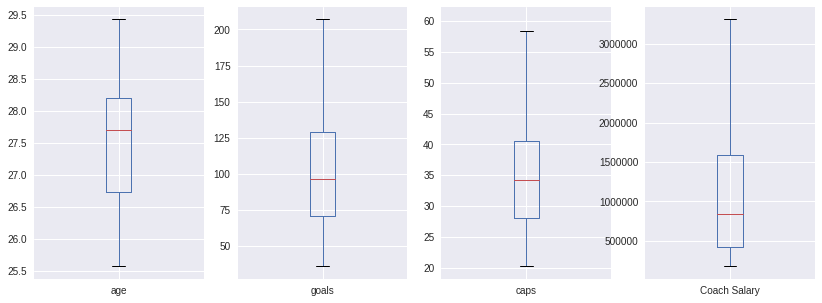

In [0]:

plt.figure(figsize = [14,5])
plt.subplot(1,4,1)
bplot1=result3.boxplot(column=['age'],figsize=(2,4),
                       grid=True)
plt.subplot(1,4,2)
bplot2=result3.boxplot(column=['goals'],figsize=(2,4),
                       grid=True)
plt.subplot(1,4,3)
bplot3=result3.boxplot(column=['caps'],figsize=(2,4),
                       grid=True)
plt.subplot(1,4,4)
bplot4=result3.boxplot(column=['Coach Salary'],figsize=(2,4),
                       grid=True)



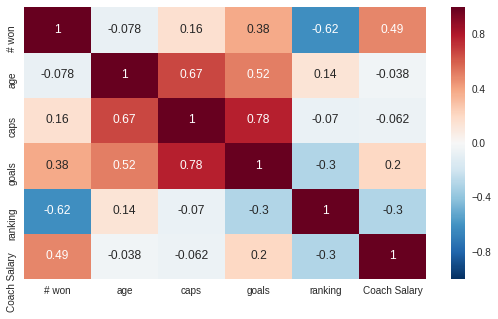

In [0]:
plt.figure(figsize=(9,5))
sns.heatmap(result3_std.corr(),annot=True) 

#Results of our basline model

In [0]:
# encapsulate performance measures in functions

def train_acc_score(model):
    return round(np.mean(cross_val_score(model,x_train,y_train,cv=k_fold,scoring="accuracy")),4)

def test_acc_score(model):
    return round(accuracy_score(y_test, model.predict(x_test)),4)

def train_prec_score(model):
    return round(precision_score(y_train,model.predict(x_train),average='macro'),4)

def test_prec_score(model):
    return round(precision_score(y_test,model.predict(x_test),average='macro'),4)


In [0]:
# function used in order to get the a confusion matrix of the classifcation model used
def confusion_matrix_model(model_used,x,y):
    cm=confusion_matrix(y,model_used.predict(x))
    col=["Predicted Draw","Predicted Team 1","Predicted Team 2"]
    cm=pd.DataFrame(cm)
    cm.columns=col
    cm.index=["Actual Draw","Actual Team 1","Actual Team 2"]
    return cm.T

def confusion_matrix_model_knockout(model_used,x,y):
    cm=confusion_matrix(y,knockout_test(model_used,x))
    col=["Predicted Team 1","Predicted Team 2"]
    cm=pd.DataFrame(cm)
    cm.columns=col
    cm.index=["Actual Team 1","Actual Team 2"]
    return cm.T

In [0]:
# function used  in order to merge the x and y_train sets with the features data frame and then give it to the model

def prepare_data(x_train,y_train,result):

    x1 = np.array(result.loc[x_train['home_team']])   # Match each home team game to it's stats 
    x2 = np.array(result.loc[x_train['away_team']])   # Match each away team game to its stats
    y = np.zeros_like(y_train.values)
    y[y_train.values == 'Draw'] = 0   #Build the classfication
    y[y_train.values == x_train['home_team'].values] = 1
    y[y_train.values == x_train['away_team'].values] = 2
    y = np.array(y,dtype=np.float64)
    x = np.hstack((x1,x2))     # Overall dataset made of 138 predictors. 69 of the same for each team
    return x,y
  

In [0]:
# function to get the observed versus predicted values
def encoder(ypred,y_train,x_train):
    ypred_label = list()
    k = 0
    for y in ypred:
        if y == 1:
            ypred_label.append(x_train['home_team'].values[k])
        elif y == 0:
            ypred_label.append('Draw')
        else:
            ypred_label.append(x_train['away_team'].values[k])
        k += 1
    return pd.DataFrame({'Predicted':ypred_label,'Observed':y_train.values})

## Classification methods

##Logisitic regression-Baseline model

###train set

In [0]:
# fit the logistic regression model
reg3 = LogisticRegression(penalty='l2',multi_class='multinomial', solver='lbfgs', random_state=123456)
x,y = prepare_data(x_train,y_train,result3_std)
reg3.fit(x,y)
ypredml1 = reg3.predict(x)
df_pred_mat_lr = confusion_matrix_model(reg3,x,y)
display("conf matrix of logisitic regression",df_pred_mat_lr) 
print("accuracy score or the model logistic regression multinomial model is:",accuracy_score(ypredml1,y))

'conf matrix of logisitic regression'

,Actual Draw,Actual Team 1,Actual Team 2
Predicted Draw,52,32,48
Predicted Team 1,612,1346,460
Predicted Team 2,322,220,472


accuracy score or the model logistic regression multinomial model is: 0.5246913580246914


### test set

In [0]:
# test set code
x,y = prepare_data(x_test1,y_test1,result3_std)
ypredml1_test = reg3.predict(x)
df_predml1_test = encoder(ypredml1_test,y_test1,x_test1)
display(df_predml1_test.head())
df_pred_light_lr_test = confusion_matrix_model(reg3,x,y)
display("conf matrix of logisitic regression of our model",df_pred_light_lr_test) 
print("accuracy score or the model logistic regression multinomial model on test set is:",accuracy_score(ypredml1_test,y))

x,y = prepare_data(x_test2,y_test2,result3_std)
df_predml1_test2 = knockout_test(reg3,x)
df_pred_light_lr_test2 = confusion_matrix_model_knockout(reg3,x,y)
display("conf matrix of lr1 of our model",df_pred_light_lr_test2) 
print("accuracy score or the baseline model with lr2 on test set is:",accuracy_score(df_predml1_test2,y))

,Observed,Predicted
0,Russia,Russia
1,Uruguay,Uruguay
2,Iran,Morocco
3,Draw,Portugal
4,France,France


'conf matrix of logisitic regression of our model'

,Actual Draw,Actual Team 1,Actual Team 2
Predicted Draw,0,0,2
Predicted Team 1,7,16,11
Predicted Team 2,2,1,9


accuracy score or the model logistic regression multinomial model on test set is: 0.5208333333333334


'conf matrix of lr1 of our model'

,Actual Team 1,Actual Team 2
Predicted Team 1,7,4
Predicted Team 2,2,3


accuracy score or the baseline model with lr2 on test set is: 0.625


##KNN-baseline model

In [0]:
#Pick the best k of the model
max_score = 0
best_k = 0 
x,y = prepare_data(x_train,y_train,result3_std)
for k in range(5,26):
    KNN3 = KNeighborsClassifier(n_neighbors = k, weights='uniform')
    score = cross_val_score(KNN3, x, y ,cv=5, scoring='accuracy').mean()
    if score > max_score:
        best_k = k
        max_score = score
 
print( 'Best K is ' + str(best_k) +'.')

Best K is 5.


###train set

In [0]:
# fit knn
KNN3=KNeighborsClassifier(n_neighbors=best_k,p=1,weights='uniform')

KNN3.fit(x,y)
#make predictions
ypredml3 = KNN3.predict(x)
#use confusion matrix function
df_pred_mat_knn = confusion_matrix_model(KNN3,x,y)
display("conf matrix of the KNN model",df_pred_mat_knn)  
print("accuracy score of the knn model:",accuracy_score(ypredml3,y))  

x,y = prepare_data(x_train,y_train,result3_std)
print("accuracy score of the knn model Validation Set:",cross_val_score(KNN3,x,y,cv=10).mean())

'conf matrix of the KNN model'

,Actual Draw,Actual Team 1,Actual Team 2
Predicted Draw,546,288,242
Predicted Team 1,330,1202,260
Predicted Team 2,110,108,478


accuracy score of the knn model: 0.6245791245791246
accuracy score of the knn model Validation Set: 0.5518964059749552


### test set1

In [0]:
# test set code
x,y = prepare_data(x_test1,y_test1,result3_std)
ypredml3_test = KNN3.predict(x)
df_predml3_test = encoder(ypredml3_test,y_test1,x_test1)
display(df_predml3_test.head())
df_pred_light_KNN_test = confusion_matrix_model(KNN3,x,y)
display("conf matrix of KNN of our model",df_pred_light_KNN_test) 
print("accuracy score or the baseline model with KNN on test set is:",accuracy_score(ypredml3_test,y))


,Observed,Predicted
0,Russia,Russia
1,Uruguay,Uruguay
2,Iran,Morocco
3,Draw,Portugal
4,France,France


'conf matrix of KNN of our model'

,Actual Draw,Actual Team 1,Actual Team 2
Predicted Draw,3,1,7
Predicted Team 1,4,14,8
Predicted Team 2,2,2,7


accuracy score or the baseline model with KNN on test set is: 0.5


## test set2

In [0]:
x,y = prepare_data(x_test2,y_test2,result3_std)

KNN3=KNeighborsClassifier(n_neighbors=best_k,p=1,weights='uniform')
KNN3.fit(x,y)
ypredml3_test2 = knockout_test(KNN3,x)
# print(min(y),max(y),min(ypredml3_test2),max(ypredml3_test2))
df_pred_light_KNN_test2 = confusion_matrix_model_knockout(KNN3,x,y)
display("conf matrix of KNN of our model",df_pred_light_KNN_test2) 
print("accuracy score or the baseline model with KNN on test set is:",accuracy_score(ypredml3_test2,y))



'conf matrix of KNN of our model'

,Actual Team 1,Actual Team 2
Predicted Team 1,2,2
Predicted Team 2,7,5


accuracy score or the baseline model with KNN on test set is: 0.4375


##Decision tree-Baseline Model

In [0]:
x,y = prepare_data(x_train,y_train,result3_std)
# fitting DecisionTreeClassifier class for depths 1-25, storing results
tree_cv_scores = []
for i in range (1,26):
  clf = DecisionTreeClassifier(criterion='gini', max_depth=i)
  clf.fit(x, y)
  train_score = clf.score(x, y)
  cv_score = cross_val_score(clf, x, y, scoring='accuracy', cv=5)
#   test_score = clf.score(x_test, y_test)
  tree_cv_scores.append({'Depth': i,
                         'Train Score': train_score,
                        'CV Mean Accuracy': cv_score.mean(),
                        'CV std.': cv_score.std(),
#                         'Test Score': test_score
                        })

columns=['Depth', 'Train Score', 'CV Mean Accuracy', 'CV std.'] # to preserve order
tree_scores_df = pd.DataFrame(tree_cv_scores, columns=columns)


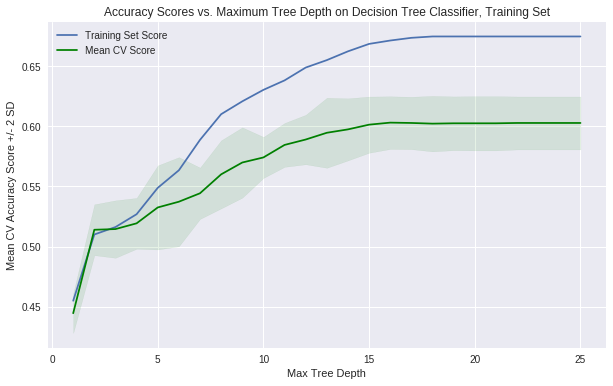

In [0]:
# plot
num_SD = 2 # number of CV std for plotting

plt.figure(figsize =(10,6))
plt.plot(tree_scores_df['Depth'], tree_scores_df['Train Score'], label='Training Set Score')
plt.plot(tree_scores_df['Depth'], tree_scores_df['CV Mean Accuracy'],label='Mean CV Score ',color='green')
plt.fill_between(
    tree_scores_df['Depth'],
    tree_scores_df['CV Mean Accuracy'] -  num_SD * tree_scores_df['CV std.'],
    tree_scores_df['CV Mean Accuracy'] +  num_SD * tree_scores_df['CV std.'],
    alpha=.1, color='green')

plt.legend()
plt.xlabel("Max Tree Depth")
plt.ylabel("Mean CV Accuracy Score +/- {} SD".format(num_SD))
plt.title("Accuracy Scores vs. Maximum Tree Depth on Decision Tree Classifier, Training Set");

In [0]:
best_index = tree_scores_df['CV Mean Accuracy'].idxmax() 
best_depth = tree_scores_df['Depth'][best_index] 

tree_clf = DecisionTreeClassifier(max_depth=best_depth).fit(x,y)
best_depth

16

##LDA and QDA

## train set

In [0]:
x,y = prepare_data(x_train,y_train,result3_std)
lda = LinearDiscriminantAnalysis()
lda.fit(x, y)
ypredlda3 = lda.predict(x)
#use confusion matrix function
df_pred_mat_lda = confusion_matrix_model(lda,x,y)
display("conf matrix of the lda model",df_pred_mat_lda)  
print("accuracy score of the lda model:",accuracy_score(ypredlda3,y))  

x,y = prepare_data(x_train,y_train,result3_std)
print("accuracy score of the lda model Validation Set:",cross_val_score(lda,x,y,cv=10).mean())

'conf matrix of the lda model'

,Actual Draw,Actual Team 1,Actual Team 2
Predicted Draw,64,40,58
Predicted Team 1,600,1326,440
Predicted Team 2,322,232,482


accuracy score of the lda model: 0.5252525252525253
accuracy score of the lda model Validation Set: 0.5247027017801897


## test set-1

In [0]:
x,y = prepare_data(x_test1,y_test1,result3_std)
lda = LinearDiscriminantAnalysis()
lda.fit(x, y)
ypredlda3 = lda.predict(x)
#use confusion matrix function
df_pred_mat_lda = confusion_matrix_model(lda,x,y)
display("conf matrix of the lda model",df_pred_mat_lda)  
print("accuracy score of the lda model:",accuracy_score(ypredlda3,y))  

x,y = prepare_data(x_train,y_train,result3_std)
print("accuracy score of the lda model Validation Set:",cross_val_score(lda,x,y,cv=10).mean())

'conf matrix of the lda model'

,Actual Draw,Actual Team 1,Actual Team 2
Predicted Draw,4,2,0
Predicted Team 1,1,14,2
Predicted Team 2,4,1,20


accuracy score of the lda model: 0.7916666666666666
accuracy score of the lda model Validation Set: 0.5247027017801897


## test set-2

In [0]:
x,y = prepare_data(x_test2,y_test2,result3_std)
lda = LinearDiscriminantAnalysis()
lda.fit(x, y)
ypredlda3 = knockout_test(lda,x)
#use confusion matrix function
# df_pred_mat_lda = confusion_matrix_model_knockout(lda,x,y)
display("conf matrix of the lda model",df_pred_mat_lda)  
print("accuracy score of the lda model:",accuracy_score(ypredlda3,y))  


'conf matrix of the lda model'

,Actual Draw,Actual Team 1,Actual Team 2
Predicted Draw,4,2,0
Predicted Team 1,1,14,2
Predicted Team 2,4,1,20


accuracy score of the lda model: 0.0


## QDA

## train set

In [0]:
x,y = prepare_data(x_train,y_train,result3_std)
qda = QuadraticDiscriminantAnalysis()
qda.fit(x, y)
ypredqda3 = qda.predict(x)
#use confusion matrix function
df_pred_mat_qda = confusion_matrix_model(qda,x,y)
display("conf matrix of the qda model",df_pred_mat_qda)  
print("accuracy score of the qda model:",accuracy_score(ypredqda3,y))  

x,y = prepare_data(x_train,y_train,result3_std)
print("accuracy score of the qda model Validation Set:",cross_val_score(qda,x,y,cv=10).mean())

'conf matrix of the qda model'

,Actual Draw,Actual Team 1,Actual Team 2
Predicted Draw,240,182,186
Predicted Team 1,482,1198,344
Predicted Team 2,264,218,450


accuracy score of the qda model: 0.5297418630751964
accuracy score of the qda model Validation Set: 0.5103846653394701


### test set-1

In [0]:
x,y = prepare_data(x_test1,y_test1,result3_std)
qda = QuadraticDiscriminantAnalysis()
qda.fit(x, y)
ypredqda3 = qda.predict(x)
#use confusion matrix function
df_pred_mat_qda = confusion_matrix_model(qda,x,y)
display("conf matrix of the qda model",df_pred_mat_qda)  
print("accuracy score of the qda model:",accuracy_score(ypredqda3,y))  

x,y = prepare_data(x_train,y_train,result3_std)
print("accuracy score of the qda model Validation Set:",cross_val_score(qda,x,y,cv=10).mean())

/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


'conf matrix of the qda model'

,Actual Draw,Actual Team 1,Actual Team 2
Predicted Draw,1,0,0
Predicted Team 1,1,17,0
Predicted Team 2,7,0,22


accuracy score of the qda model: 0.8333333333333334
accuracy score of the qda model Validation Set: 0.5103846653394701


## test set-2

In [0]:
x,y = prepare_data(x_test2,y_test2,result3_std)
qda = QuadraticDiscriminantAnalysis()
qda.fit(x, y)
ypredqda3_test2 = qda.predict(x)
#use confusion matrix function
# df_pred_mat_qda = confusion_matrix_model(qda,x,y)
# display("conf matrix of the qda model",df_pred_mat_qda)  
print("accuracy score of the qda model:",accuracy_score(ypredqda3_test2,y))  

x,y = prepare_data(x_train,y_train,result3_std)
print("accuracy score of the qda model Validation Set:",cross_val_score(qda,x,y,cv=10).mean())

accuracy score of the qda model: 1.0
accuracy score of the qda model Validation Set: 0.5103846653394701


/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


# Ensemble methods

## Random Forest- baseline model

## train set

In [0]:
# fit the random forest model and get its accuracy score
x,y = prepare_data(x_train,y_train,result3_std)
rfml = RandomForestClassifier(n_estimators=50, oob_score=True, max_depth=10,random_state=1234)
rfml.fit(x, y)
ypredml2=rfml.predict(x)

print("accuracy score for the random forest model:",accuracy_score(ypredml2,y))


accuracy score for the random forest model: 0.6728395061728395


## test set 1

In [0]:
# fit the random forest model and get its accuracy score
x,y = prepare_data(x_test1,y_test1,result3_std)
# rfml = RandomForestClassifier(n_estimators=50, oob_score=True, max_depth=10,random_state=1234)
# rfml.fit(x, y)
ypredml2=rfml.predict(x)

print("accuracy score for the random forest test1 model:",accuracy_score(ypredml2,y))


accuracy score for the random forest test1 model: 0.6666666666666666


## test set 2

In [0]:
# fit the random forest model and get its accuracy score
x,y = prepare_data(x_test2,y_test2,result3_std)
# rfml = RandomForestClassifier(n_estimators=50, oob_score=True, max_depth=10,random_state=1234)
# rfml.fit(x, y)
ypredml2=knockout_test(rfml,x)

print("accuracy score for the random forest test2 model:",accuracy_score(ypredml2,y))


accuracy score for the random forest test2 model: 0.1875


##Bagging

In [0]:
from sklearn.utils import resample


x,y = prepare_data(x_train,y_train,result3_std)
xt1,yt1 = prepare_data(x_test1,y_test1,result3_std)
xt2,yt2 = prepare_data(x_test2,y_test2,result3_std)

np.random.seed(0)

N_bootstraps = 45
bagging_train = np.zeros((x.shape[0], N_bootstraps),dtype=int)
bagging_test1 = np.zeros((xt1.shape[0], N_bootstraps),dtype=int)
bagging_test2 = np.zeros((xt2.shape[0], N_bootstraps),dtype=int)
bagging_trees = []

simpletree = DecisionTreeClassifier(max_depth=16)

# bootstrapping, saving results each time
for i in range(N_bootstraps):
  boot_xx, boot_y = resample(x, y)
  bagging_trees.append(simpletree.fit(boot_xx, boot_y))
  bagging_train[:, i] = simpletree.predict(x)
  bagging_test1[:, i] = simpletree.predict(xt1)
  bagging_test2[:, i] = simpletree.predict(xt2)


# format table
columns = ["Bootstrap-Model_"+str(i+1) for i in range(N_bootstraps)]
rows_train = ["Training-Row_" + str(i+1) for i in range(len(x))]
rows_test1 = ["Test-Row_" + str(i+1) for i in range(len(xt1))]
rows_test2 = ["Test-Row_" + str(i+1) for i in range(len(xt2))]


bagging_train = pd.DataFrame(bagging_train, columns=columns, index=rows_train)
bagging_test1 = pd.DataFrame(bagging_test1, columns=columns, index=rows_test1)
bagging_test2 = pd.DataFrame(bagging_test2, columns=columns, index=rows_test2)


print("train bootstrapped table:")
display(bagging_train.head())
print("\ntest bootstrapped table:")
display(bagging_test.head())


train bootstrapped table:


,Bootstrap-Model_1,Bootstrap-Model_2,Bootstrap-Model_3,Bootstrap-Model_4,Bootstrap-Model_5,Bootstrap-Model_6,Bootstrap-Model_7,Bootstrap-Model_8,Bootstrap-Model_9,Bootstrap-Model_10,...,Bootstrap-Model_36,Bootstrap-Model_37,Bootstrap-Model_38,Bootstrap-Model_39,Bootstrap-Model_40,Bootstrap-Model_41,Bootstrap-Model_42,Bootstrap-Model_43,Bootstrap-Model_44,Bootstrap-Model_45
Training-Row_1,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,0,2,2,2,2,2
Training-Row_2,0,1,1,1,2,0,0,1,1,0,...,1,0,0,1,0,2,1,1,0,0
Training-Row_3,1,1,1,1,1,1,1,1,1,2,...,1,1,1,2,1,1,2,2,1,1
Training-Row_4,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
Training-Row_5,2,2,2,2,2,2,2,2,2,2,...,0,2,2,2,2,2,2,2,2,2



test bootstrapped table:


,Bootstrap-Model_1,Bootstrap-Model_2,Bootstrap-Model_3,Bootstrap-Model_4,Bootstrap-Model_5,Bootstrap-Model_6,Bootstrap-Model_7,Bootstrap-Model_8,Bootstrap-Model_9,Bootstrap-Model_10,...,Bootstrap-Model_36,Bootstrap-Model_37,Bootstrap-Model_38,Bootstrap-Model_39,Bootstrap-Model_40,Bootstrap-Model_41,Bootstrap-Model_42,Bootstrap-Model_43,Bootstrap-Model_44,Bootstrap-Model_45
Test-Row_1,0,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,0,1,1,1,1
Test-Row_2,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
Test-Row_3,2,2,2,2,2,0,2,2,2,2,...,2,2,2,1,1,2,0,2,2,2
Test-Row_4,0,0,0,0,1,0,0,0,2,0,...,0,0,0,0,0,2,0,0,1,1
Test-Row_5,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [0]:
# get majority to generate combined predictions
y_hat_train_maj = (np.mean(bagging_train,axis=1)>.5).astype(int)
y_hat_test_maj1 = (np.mean(bagging_test1,axis=1)>.5).astype(int)
y_hat_test_maj2 = (np.mean(bagging_test2,axis=1)>.5).astype(int)


bagged_accuracy_train = accuracy_score(y, y_hat_train_maj)
bagged_accuracy_test1 = accuracy_score(yt1, y_hat_test_maj1)
bagged_accuracy_test2 = accuracy_score(yt2, y_hat_test_maj2)


print("bagging model, training set accuracy:", bagged_accuracy_train)
print("bagging model, test-1 set accuracy:", bagged_accuracy_test1)
print("bagging model, test-2 set accuracy:", bagged_accuracy_test2)


bagging model, training set accuracy: 0.5359147025813692
bagging model, test-1 set accuracy: 0.4166666666666667
bagging model, test-2 set accuracy: 0.4375


In [0]:
def running_predictions(prediction_dataset, targets):
    """A function to predict examples' class via the majority among trees (ties are predicted as 0)
    
    Inputs:
      prediction_dataset - a (n_examples by n_sub_models) dataset, where each entry [i,j] is sub-model j's prediction
          for example i
      targets - the true class labels
    
    Returns:
      a vector where vec[i] is the model's accuracy when using just the first i+1 sub-models
    """
    
    n_trees = prediction_dataset.shape[1]
    
    # find the running percentage of models voting 1 as more models are considered
    running_percent_1s = np.cumsum(prediction_dataset, axis=1)/np.arange(1,n_trees+1)
    
    # predict 1 when the running average is above 0.5
    running_conclusions = running_percent_1s > 0.5
    
    # check whether the running predictions match the targets
    running_correctnesss = running_conclusions == targets.reshape(-1,1)
    
    return np.mean(running_correctnesss, axis=0)
    # returns a 1-d series of the accuracy of using the first n trees to predict the targets

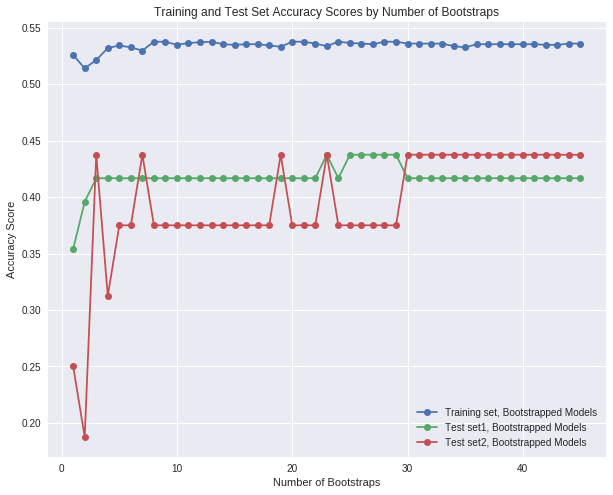

In [0]:
running_pred_train = running_predictions(bagging_train.values, y)
running_pred_test1 = running_predictions(bagging_test1.values, yt1)
running_pred_test2 = running_predictions(bagging_test2.values, yt2)

overfit_model = DecisionTreeClassifier(max_depth=16).fit(x, y)
ypred_overfit = overfit_model.predict(xt1)

plt.figure(figsize=(10,8))
plt.plot(range(1,46), running_pred_train, 'o-', label='Training set, Bootstrapped Models')
plt.plot(range(1,46), running_pred_test1, 'o-', label='Test set1, Bootstrapped Models')
plt.plot(range(1,46), running_pred_test2, 'o-', label='Test set2, Bootstrapped Models')
plt.title('Training and Test Set Accuracy Scores by Number of Bootstraps')
plt.xlabel('Number of Bootstraps')
plt.ylabel('Accuracy Score')
plt.legend();

# Boosting

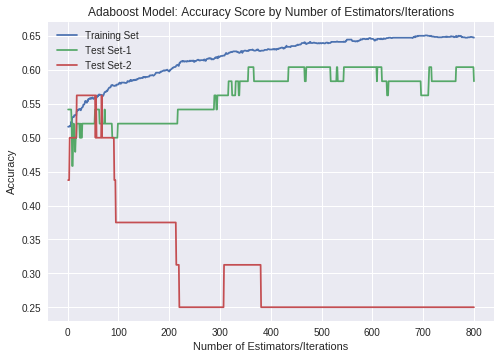

In [0]:
n_estimators = 800
learning_rate = 0.05

x,y = prepare_data(x_train,y_train,result3_std)
ab = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3),
                            n_estimators=n_estimators, learning_rate=learning_rate)
ab.fit(x, y)
xt1,yt1 = prepare_data(x_test1,y_test1,result3_std)
xt2,yt2 = prepare_data(x_test2,y_test2,result3_std)
ab_scores_train = list(ab.staged_score(x, y))
ab_scores_test1 = list(ab.staged_score(xt1, yt1))
ab_scores_test2 = list(ab.staged_score(xt2, yt2))

x_plot = range(1, n_estimators+1) # just so we plot x-values of 1-800 instead of 0-799

plt.plot(x_plot, ab_scores_train, label='Training Set')
plt.plot(x_plot, ab_scores_test1, label='Test Set-1')
plt.plot(x_plot, ab_scores_test2, label='Test Set-2')
plt.title('Adaboost Model: Accuracy Score by Number of Estimators/Iterations')
plt.xlabel('Number of Estimators/Iterations')
plt.ylabel('Accuracy')
plt.legend();

In [0]:
# List of lists of the staged predictions
staged_scores_train = []
staged_scores_test1 = []
staged_scores_test2 = []

for depth in range(1,5):
  ab = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=depth),
                            n_estimators=n_estimators, learning_rate=learning_rate)
  ab.fit(x, y)

  ab_scores_train = list(ab.staged_score(x, y))
  ab_scores_test1 = list(ab.staged_score(xt1, yt1))
  ab_scores_test2 = list(ab.staged_score(xt2, yt2))
  
  staged_scores_train.append(ab_scores_train)
  staged_scores_test1.append(ab_scores_test1)
  staged_scores_test2.append(ab_scores_test2)


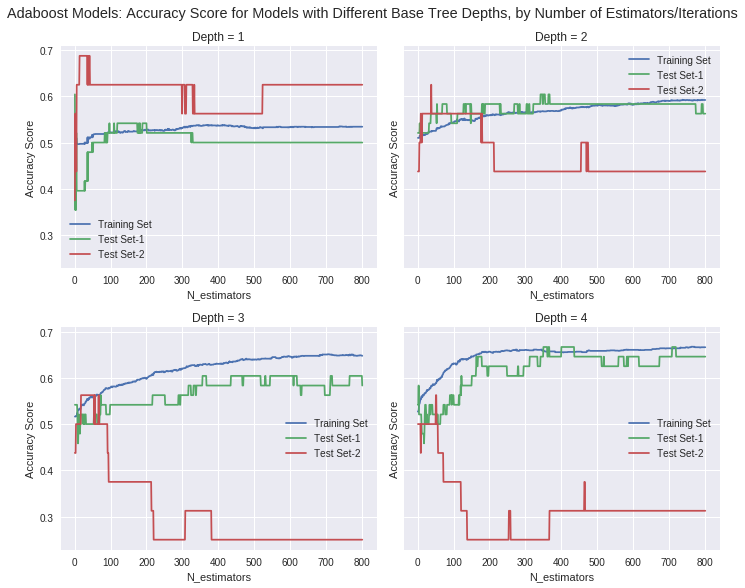

In [0]:
fig, axs = plt.subplots(2,2,figsize=(10,8), sharey=True)

for i, ax in enumerate(axs.ravel()):
  ax.plot(x_plot, staged_scores_train[i], label='Training Set')
  ax.plot(x_plot, staged_scores_test1[i], label='Test Set-1')
  ax.plot(x_plot, staged_scores_test2[i], label='Test Set-2')
  ax.set_title('Depth = {}'.format(i+1))
  ax.set_xlabel('N_estimators')
  ax.set_ylabel('Accuracy Score')
  ax.legend();

plt.tight_layout()
plt.suptitle('Adaboost Models: Accuracy Score for Models with Different Base Tree Depths, \
by Number of Estimators/Iterations', x=.5, y=1.02);

In [0]:
staged_scores_test_array1 = np.array(staged_scores_test1)
staged_scores_test_array2 = np.array(staged_scores_test2)


for i, depth_scores in enumerate(staged_scores_test_array1):
  depth = i+1
  idx = (np.argmax(depth_scores))
  print("Depth = {}: best train set accuracy at {} estimators.".format(depth, idx+1))
  print("train set accuracy score: {}\n".format(depth_scores[idx]))
  
  
for i, depth_scores in enumerate(staged_scores_test_array2):
  depth = i+1
  idx = (np.argmax(depth_scores))
  print("Depth = {}: best train set accuracy at {} estimators.".format(depth, idx+1))
  print("train set accuracy score: {}\n".format(depth_scores[idx]))

Depth = 1: best train set accuracy at 1 estimators.
train set accuracy score: 0.6041666666666666

Depth = 2: best train set accuracy at 342 estimators.
train set accuracy score: 0.6041666666666666

Depth = 3: best train set accuracy at 356 estimators.
train set accuracy score: 0.6041666666666666

Depth = 4: best train set accuracy at 350 estimators.
train set accuracy score: 0.6666666666666666

Depth = 1: best train set accuracy at 14 estimators.
train set accuracy score: 0.6875

Depth = 2: best train set accuracy at 38 estimators.
train set accuracy score: 0.625

Depth = 3: best train set accuracy at 18 estimators.
train set accuracy score: 0.5625

Depth = 4: best train set accuracy at 51 estimators.
train set accuracy score: 0.5625



##Neural Network


## train set

In [0]:
x,y = prepare_data(x_train,y_train,result3_std)
y_nn = []
for value in y:
  if value == 0:
    y_nn.append([1,0,0])
  elif value == 1:
    y_nn.append([0,1,0])
  else:
    y_nn.append([0,0,1])

y_nn = np.array(y_nn)

model_nn = Sequential([
    Dense(200, input_shape=(x.shape[1],), activation='relu'),
    # Dense(100, activation='relu'),
    # Dense(50, activation='relu'),
    Dense(3, activation='linear')
])


model_nn.compile(loss='mean_absolute_error', 
              optimizer='adam',metrics=['acc'])
model_nn.summary()

model_nn.fit(x, y_nn, 
          epochs=10*32, 
          batch_size=32, 
          validation_split=.2,
          verbose=False)


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 200)               2600      
_________________________________________________________________
dense_10 (Dense)             (None, 3)                 603       
Total params: 3,203
Trainable params: 3,203
Non-trainable params: 0
_________________________________________________________________


In [0]:
res=model_nn.evaluate(x, y_nn, verbose=False)

print("the loss of this model is:",res[0])
print("the accuracy of this model is:",res[1])

the loss of this model is: 0.2661399034036932
the accuracy of this model is: 0.6419753087088717


## regularized neural network train set

In [0]:
from keras.constraints import maxnorm

model2 = Sequential()
model2.add(Dense(60, input_shape=(x.shape[1],), kernel_initializer='normal', activation='relu', kernel_constraint=maxnorm(3)))
model2.add(Dropout(0.2))
model2.add(Dense(30, kernel_initializer='normal', activation='relu', kernel_constraint=maxnorm(3)))
model2.add(Dropout(0.2))
model2.add(Dense(3, kernel_initializer='normal', activation='linear'))
# Compile model
  
model2.compile(loss='mean_absolute_error', 
              optimizer='adam',metrics=['acc'])

model2.fit(x, y_nn, 
          epochs=10*32, 
          batch_size=32, 
          validation_split=.2,
          verbose=False)

print('Model 2')
print(model2.evaluate(x, y_nn, verbose=False))

model3 = Sequential()
model3.add(Dropout(0.2, input_shape=(x.shape[1],)))
model3.add(Dense(60, kernel_initializer='normal', activation='relu', kernel_constraint=maxnorm(3)))
model3.add(Dense(30, kernel_initializer='normal', activation='relu', kernel_constraint=maxnorm(3)))
model3.add(Dense(3, kernel_initializer='normal', activation='linear'))
	# Compile model
model3.compile(loss='mean_absolute_error', 
              optimizer='adam',metrics=['acc'])

model3.fit(x, y_nn, 
          epochs=10*32, 
          batch_size=32, 
          validation_split=.2,
          verbose=False)

print('Model 3')
print(model3.evaluate(x, y_nn, verbose=False))

Model 2
[0.2679836595499957, 0.5213243545907916]
Model 3
[0.27311980001854175, 0.5140291807627437]


## test set1

In [0]:
x,y = prepare_data(x_test1,y_test1,result3_std)
y_nn = []
for value in y:
  if value == 0:
    y_nn.append([1,0,0])
  elif value == 1:
    y_nn.append([0,1,0])
  else:
    y_nn.append([0,0,1])

y_nn = np.array(y_nn)

ypred_proba_nn = model_nn.predict(x)

ypred_nn = []
for value in ypred_proba_nn:
  if value[0] == 1:
    ypred_nn.append(0)
  elif value[1] == 1:
    ypred_nn.append(1)
  else:
    ypred_nn.append(2)

ypred_nn_test1 = np.array(ypred_nn)
    
print("The accuracy score of test set 1 of this neural net is:",accuracy_score(ypred_nn_test1,y))



The accuracy score of test set 1 of this neural net is: 0.4583333333333333


## test set 2

In [0]:

x,y = prepare_data(x_test2,y_test2,result3_std)

ypred_nn_test2 = knockout_test(model_nn,x)

print("The accuracy score of test set 1 of this neural net is:",accuracy_score(ypred_nn_test2,y))


The accuracy score of test set 1 of this neural net is: 0.3125


# Model comparison

In [0]:
models = [reg3, tree_clf, lda, qda, KNN3,rfml]
labels = ['Logistic Regression' ,'Decision Tree','LDA','QDA','KNN','Random Forest']
x,y = prepare_data(x_train,y_train,result3)
cv_scores = []
for model, label in zip(models, labels):
  cv_score = cross_val_score(model, x, y, scoring='accuracy', cv=7).mean()
  cv_scores.append({'Model': label,
                        'CV_Accuracy': cv_score})
  
scores_df = pd.DataFrame(cv_scores, columns=['Model', 'CV_Accuracy'])
scores_df.sort_values(by='CV_Accuracy', ascending=False, inplace=True)
scores_df.reset_index(drop=True, inplace=True)
scores_df.index +=1 # So the indices will be model rankings by score


print("Mean CV Accuracy Score by Model:")
display(scores_df.round(4))

Mean CV Accuracy Score by Model:


,Model,CV_Accuracy
1,Random Forest,0.6016
2,Decision Tree,0.5864
3,KNN,0.5404
4,LDA,0.5205
5,QDA,0.5126
6,Logistic Regression,0.4950


### Coefficient analysis-Logistic regression

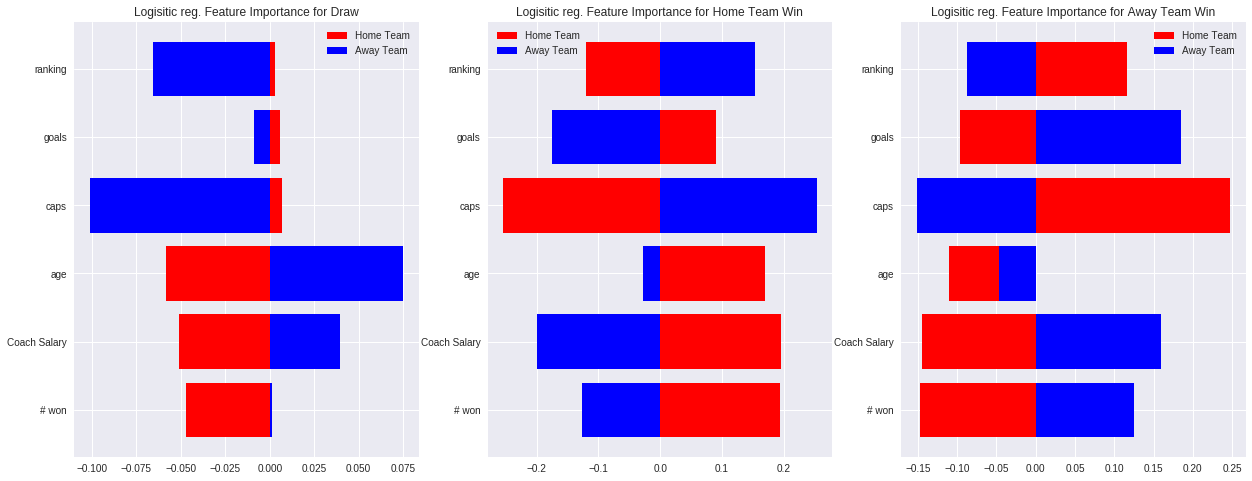

In [0]:
plt.figure(figsize = [21,8])
plt.subplot(1,3,1)
plt.title('Logisitic reg. Feature Importance for Draw')
plt.barh(result3.columns,reg3.coef_[0,:6],color='r')
plt.barh(result3.columns,reg3.coef_[0,6:],color='b')
plt.legend(['Home Team','Away Team'])
plt.subplot(1,3,2)
plt.title('Logisitic reg. Feature Importance for Home Team Win')
plt.barh(result3.columns,reg3.coef_[1,:6],color='r')
plt.barh(result3.columns,reg3.coef_[1,6:],color='b')
plt.legend(['Home Team','Away Team'])
plt.subplot(1,3,3)
plt.title('Logisitic reg. Feature Importance for Away Team Win')
plt.barh(result3.columns,reg3.coef_[2,:6],color='r')
plt.barh(result3.columns,reg3.coef_[2,6:],color='b')
plt.legend(['Home Team','Away Team'])


<Container object of 1 artists>

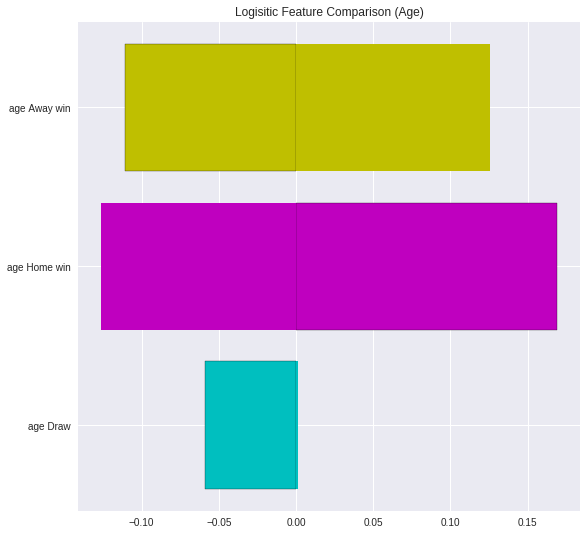

In [0]:
# result3 coefficients

plt.figure(figsize = [9,9])
plt.title('Logisitic Feature Comparison (Age)')
plt.barh(result3.columns[1]+' Draw',reg3.coef_[0,1],color='c',edgecolor='k')
plt.barh(result3.columns[1]+' Draw',reg3.coef_[0,6],color='c')
plt.barh(result3.columns[1]+' Home win',reg3.coef_[1,1],color='m',edgecolor='k')
plt.barh(result3.columns[1]+' Home win',reg3.coef_[1,6],color='m')
plt.barh(result3.columns[1]+' Away win',reg3.coef_[2,1],color='y',edgecolor='k')
plt.barh(result3.columns[1]+' Away win',reg3.coef_[2,6],color='y')


In [0]:
# x,y = prepare_data(x_train,y_train,result3_std)

# x_train2,y_train2 = prepare_data(x_train,y_train,result3_std)

# multi_classes = ['ovr', 'multinomial']

# solvers = {'l1':['liblinear', 'saga'],'l2':['newton-cg', 'lbfgs','sag']}

# penalties = ['l1','l2']

# sub_dict = {'train_score':0,'val_score':0}
# ovr_scores = {'l1/liblinear':sub_dict, 'l1/saga':sub_dict,'l2/newton-cg':sub_dict, 'l2/lbfgs':sub_dict,'l2/sag':sub_dict}
# multinomial_scores = {'l1/liblinear':sub_dict, 'l1/saga':sub_dict,'l2/newton-cg':sub_dict, 'l2/lbfgs':sub_dict,'l2/sag':sub_dict}

# for multi_class in multi_classes:
#   for penalty in penalties:
#     for solver in solvers[penalty]:
#       if multi_class == 'multinomial' and solver =='liblinear':
#         scores = [0,0]
#       else:
#         clf = LogisticRegressionCV(cv=5, random_state=0,multi_class=multi_class,solver=solver,penalty=penalty).fit(x, y)
#         scores = [clf.score(x, y),clf.score(x_train2, y_train2)]
#       if multi_class == 'ovr':
#         ovr_scores[penalty+'/'+solver]['train_score'] = scores[0]
#         print(ovr_scores['l1/liblinear']['train_score'])
#         ovr_scores[penalty+'/'+solver]['val_score'] = scores[1]
#       else:
#         multinomial_scores[penalty+'/'+solver]['train_score'] = scores[0]
      
#         multinomial_scores[penalty+'/'+solver]['val_score'] = scores[1]
      
# display(pd.DataFrame(ovr_scores))
# display(pd.DataFrame(multinomial_scores))

#Our model built from scratch


In [0]:
# sofifa complete dataset
response = requests.get('https://drive.google.com/uc?export=download&id=12Km8bbBwLulQi2uFymPSCkXBTB5Ws-qj')
#have to decode the bytes before it can be read by pandas into df
df1 = pd.read_csv(BytesIO(response.content),index_col=0)
df1.head()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (23,35) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,...,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST
0,Cristiano Ronaldo,32,https://cdn.sofifa.org/48/18/players/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Real Madrid CF,https://cdn.sofifa.org/24/18/teams/243.png,€95.5M,...,61.0,53.0,82.0,62.0,91.0,89.0,92.0,91.0,66.0,92.0
1,L. Messi,30,https://cdn.sofifa.org/48/18/players/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,93,93,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,€105M,...,57.0,45.0,84.0,59.0,92.0,90.0,88.0,91.0,62.0,88.0
2,Neymar,25,https://cdn.sofifa.org/48/18/players/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,94,Paris Saint-Germain,https://cdn.sofifa.org/24/18/teams/73.png,€123M,...,59.0,46.0,79.0,59.0,88.0,87.0,84.0,89.0,64.0,84.0
3,L. Suárez,30,https://cdn.sofifa.org/48/18/players/176580.png,Uruguay,https://cdn.sofifa.org/flags/60.png,92,92,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,€97M,...,64.0,58.0,80.0,65.0,88.0,85.0,88.0,87.0,68.0,88.0
4,M. Neuer,31,https://cdn.sofifa.org/48/18/players/167495.png,Germany,https://cdn.sofifa.org/flags/21.png,92,92,FC Bayern Munich,https://cdn.sofifa.org/24/18/teams/21.png,€61M,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
# rank players according to their overall score
df1.nlargest(100, columns='Overall').head()

,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,...,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST
0,Cristiano Ronaldo,32,https://cdn.sofifa.org/48/18/players/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Real Madrid CF,https://cdn.sofifa.org/24/18/teams/243.png,€95.5M,...,61.0,53.0,82.0,62.0,91.0,89.0,92.0,91.0,66.0,92.0
1,L. Messi,30,https://cdn.sofifa.org/48/18/players/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,93,93,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,€105M,...,57.0,45.0,84.0,59.0,92.0,90.0,88.0,91.0,62.0,88.0
2,Neymar,25,https://cdn.sofifa.org/48/18/players/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,94,Paris Saint-Germain,https://cdn.sofifa.org/24/18/teams/73.png,€123M,...,59.0,46.0,79.0,59.0,88.0,87.0,84.0,89.0,64.0,84.0
3,L. Suárez,30,https://cdn.sofifa.org/48/18/players/176580.png,Uruguay,https://cdn.sofifa.org/flags/60.png,92,92,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,€97M,...,64.0,58.0,80.0,65.0,88.0,85.0,88.0,87.0,68.0,88.0
4,M. Neuer,31,https://cdn.sofifa.org/48/18/players/167495.png,Germany,https://cdn.sofifa.org/flags/21.png,92,92,FC Bayern Munich,https://cdn.sofifa.org/24/18/teams/21.png,€61M,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
# clean unnecessary columns and strip the value and wage column from non numeric signs to make the data analyzable
df1_clean=df1.drop(["Photo","Flag","Club Logo"],axis=1)
df1_clean['Value'] = df1_clean['Value'].str.replace('€', '')
df1_clean['Wage']=df1_clean['Wage'].str.replace('€','')

#parse string for millions and thousands to numeric values
def parseValueColumn(strVal):
    if 'M' in strVal:
        return int(float(strVal.replace('M', '')) * 1000000)
    elif 'K' in strVal:
        return int(float(strVal.replace('K', '')) * 1000)
    else:
        return int(strVal)   
#parse string for thousands to numeric values 
def parseWageColumn(strVal):
  if 'K' in strVal:
    return int(float(strVal.replace('K', '')) * 1000)
  else:
    return int(strVal)   
 
df1_clean['Value'] = df1_clean['Value'].apply(lambda x: parseValueColumn(x))
df1_clean['Wage']=df1_clean['Wage'].apply(lambda x: parseWageColumn(x))

In [0]:
# check for null data
df1.isnull().sum()

Name                      0
Age                       0
Photo                     0
Nationality               0
Flag                      0
Overall                   0
Potential                 0
Club                    248
Club Logo                 0
Value                     0
Wage                      0
Special                   0
Acceleration              0
Aggression                0
Agility                   0
Balance                   0
Ball control              0
Composure                 0
Crossing                  0
Curve                     0
Dribbling                 0
Finishing                 0
Free kick accuracy        0
GK diving                 0
GK handling               0
GK kicking                0
GK positioning            0
GK reflexes               0
Heading accuracy          0
Interceptions             0
                       ... 
Vision                    0
Volleys                   0
CAM                    2029
CB                     2029
CDM                 

In [0]:
df1_clean.head()

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,Acceleration,...,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST
0,Cristiano Ronaldo,32,Portugal,94,94,Real Madrid CF,95500000,565000,2228,89,...,61.0,53.0,82.0,62.0,91.0,89.0,92.0,91.0,66.0,92.0
1,L. Messi,30,Argentina,93,93,FC Barcelona,105000000,565000,2154,92,...,57.0,45.0,84.0,59.0,92.0,90.0,88.0,91.0,62.0,88.0
2,Neymar,25,Brazil,92,94,Paris Saint-Germain,123000000,280000,2100,94,...,59.0,46.0,79.0,59.0,88.0,87.0,84.0,89.0,64.0,84.0
3,L. Suárez,30,Uruguay,92,92,FC Barcelona,97000000,510000,2291,88,...,64.0,58.0,80.0,65.0,88.0,85.0,88.0,87.0,68.0,88.0
4,M. Neuer,31,Germany,92,92,FC Bayern Munich,61000000,230000,1493,58,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
df1_clean.columns

Index(['Name', 'Age', 'Nationality', 'Overall', 'Potential', 'Club', 'Value',
       'Wage', 'Special', 'Acceleration', 'Aggression', 'Agility', 'Balance',
       'Ball control', 'Composure', 'Crossing', 'Curve', 'Dribbling',
       'Finishing', 'Free kick accuracy', 'GK diving', 'GK handling',
       'GK kicking', 'GK positioning', 'GK reflexes', 'Heading accuracy',
       'Interceptions', 'Jumping', 'Long passing', 'Long shots', 'Marking',
       'Penalties', 'Positioning', 'Reactions', 'Short passing', 'Shot power',
       'Sliding tackle', 'Sprint speed', 'Stamina', 'Standing tackle',
       'Strength', 'Vision', 'Volleys', 'CAM', 'CB', 'CDM', 'CF', 'CM', 'ID',
       'LAM', 'LB', 'LCB', 'LCM', 'LDM', 'LF', 'LM', 'LS', 'LW', 'LWB',
       'Preferred Positions', 'RAM', 'RB', 'RCB', 'RCM', 'RDM', 'RF', 'RM',
       'RS', 'RW', 'RWB', 'ST'],
      dtype='object')

In [0]:
# limit the players for only the players in the world cup
df1_clean=df1_clean[df1_clean['Nationality'].isin(countrylist)]
display(df1_clean.shape)
df1_clean.columns
df1_clean.dtypes

(11686, 71)

Name                    object
Age                      int64
Nationality             object
Overall                  int64
Potential                int64
Club                    object
Value                    int64
Wage                     int64
Special                  int64
Acceleration            object
Aggression              object
Agility                 object
Balance                 object
Ball control            object
Composure               object
Crossing                object
Curve                   object
Dribbling               object
Finishing               object
Free kick accuracy      object
GK diving               object
GK handling             object
GK kicking              object
GK positioning          object
GK reflexes             object
Heading accuracy        object
Interceptions           object
Jumping                 object
Long passing            object
Long shots              object
                        ...   
Vision                  object
Volleys 

Text(0,0.5,'Count')

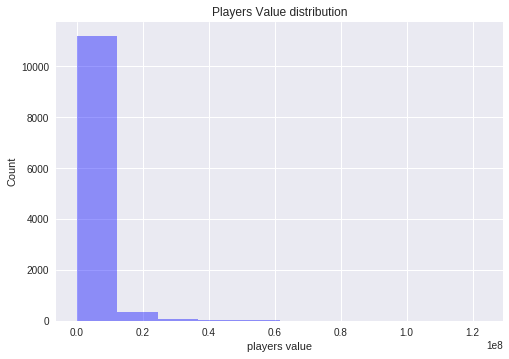

In [0]:
# show players value distribution
plt.hist(df1_clean['Value'], bins=10, alpha=0.4, color='b')
plt.title("Players Value distribution")
plt.xlabel("players value")
plt.ylabel("Count")

#Analysis of our own model's full features dataframe

In [0]:
# change object type data to integer for pivot table and fill 0 in string values
df1_clean.iloc[:,9:43]=df1_clean.iloc[:,9:43].apply(pd.to_numeric, errors='coerce').fillna(0).astype(int)

In [0]:
players_pivot = pd.pivot_table(df1_clean,index='Nationality', aggfunc='mean')
players_pivot['country'] = players_pivot.index
players_pivot.head()

,Acceleration,Age,Aggression,Agility,Balance,Ball control,CAM,CB,CDM,CF,...,Special,Sprint speed,Stamina,Standing tackle,Strength,Value,Vision,Volleys,Wage,country
Nationality,,,,,,,,,,,,,,,,,,,,,
Argentina,64.584456,25.932642,55.247668,63.623834,64.943005,58.800000,60.710465,55.486047,57.126744,60.563953,...,1620.636269,64.580311,63.014508,46.212435,64.113990,2.908699e+06,53.920207,44.503627,12752.331606,Argentina
Australia,64.303965,24.312775,53.154185,61.814978,62.607930,52.779736,55.578680,54.482234,54.989848,55.223350,...,1515.881057,65.105727,61.832599,47.422907,64.894273,7.339868e+05,50.101322,37.660793,4114.537445,Australia
Belgium,63.319853,23.893382,54.444853,63.908088,63.404412,59.705882,61.982684,56.043290,58.480519,61.411255,...,1619.849265,63.856618,61.088235,45.474265,63.783088,4.450092e+06,54.628676,44.919118,19194.852941,Belgium
Brazil,66.439655,27.208128,59.816502,65.306650,64.038177,63.248768,63.122340,58.454787,60.143617,63.029255,...,1710.948276,66.811576,65.019704,50.869458,67.185961,4.008898e+06,57.556650,49.998768,18736.453202,Brazil
Colombia,66.429054,25.388514,53.596284,64.327703,64.927365,57.097973,58.020408,54.352505,55.458256,57.873840,...,1571.844595,66.322635,65.275338,46.072635,65.403716,1.708860e+06,51.471284,40.246622,5859.797297,Colombia


In [0]:
# this dataframe englobes all the predictors that make our own model
result2 = pd.merge(df_wins, players_pivot, on='country')
result2 = pd.merge(result2,df_ranking, on='country')
result2= pd.merge(result2, players_features,on='country')
result2 = result2.set_index('country')
# drop non relevant columns
result2=result2.drop(['ranking','ID','age','caps','goals'], axis=1)
result2.loc['South Korea'] = result2.mean()
result2.head()

,# won,Acceleration,Age,Aggression,Agility,Balance,Ball control,CAM,CB,CDM,...,Sprint speed,Stamina,Standing tackle,Strength,Value,Vision,Volleys,Wage,CL League 2017-2018,Top League
country,,,,,,,,,,,,,,,,,,,,,
Egypt,6.0,66.562500,27.250000,59.187500,64.906250,66.468750,61.718750,62.620690,58.551724,60.241379,...,64.843750,65.125000,51.750000,69.437500,2.958437e+06,56.875000,47.937500,16062.500000,1.0,7.0
Russia,5.0,62.169935,25.232026,52.862745,60.238562,61.692810,54.127451,59.816000,57.020000,58.032000,...,61.130719,58.555556,46.627451,62.944444,2.006209e+06,51.111111,41.415033,16637.254902,8.0,1.0
Saudi Arabia,2.0,63.793313,25.252280,51.954407,62.747720,65.243161,50.693009,54.134752,52.198582,52.755319,...,63.942249,61.060790,43.650456,62.358663,5.641641e+05,47.890578,36.796353,6990.881459,0.0,3.0
Uruguay,7.0,65.196078,26.124183,57.660131,62.333333,64.287582,60.836601,61.507246,56.028986,57.550725,...,65.633987,63.464052,47.437908,65.980392,4.146046e+06,52.588235,46.594771,17333.333333,7.0,11.0
Iran,4.0,66.764706,24.882353,57.058824,65.470588,62.941176,57.117647,64.142857,53.142857,55.571429,...,67.352941,59.000000,39.411765,64.647059,2.822353e+06,58.176471,50.764706,9117.647059,2.0,1.0


In [0]:
# Standardize the feature dataset
result2_std = (result2-result2.mean())/result2.std()
result2_std

,# won,Acceleration,Age,Aggression,Agility,Balance,Ball control,CAM,CB,CDM,...,Sprint speed,Stamina,Standing tackle,Strength,Value,Vision,Volleys,Wage,CL League 2017-2018,Top League
country,,,,,,,,,,,,,,,,,,,,,
Egypt,-0.213267,0.590170,2.047348,0.754439,0.594921,1.138137,0.841515,1.037926,1.374589,1.473563,...,-0.072050,0.879177,1.606122,1.296947,0.298354,1.174404,0.914263,0.699775,-0.939500,-0.755005
Russia,-0.528089,-0.976277,-0.045982,-1.085022,-1.363505,-0.826752,-1.116339,0.010670,0.653287,0.469538,...,-1.380452,-2.089858,-0.187332,-0.942367,-0.444818,-0.642398,-0.736420,0.807301,0.205846,-1.643808
Saudi Arabia,-1.472556,-0.397359,-0.024972,-1.349199,-0.310735,0.633912,-2.002107,-2.070163,-1.617160,-1.928384,...,-0.389722,-0.957627,-1.229607,-1.144390,-1.570271,-1.657523,-1.905300,-0.997344,-1.103121,-1.347540
Uruguay,0.101556,0.102886,0.879490,0.310227,-0.484600,0.240774,0.614002,0.630112,0.186610,0.250829,...,0.206415,0.128518,0.096417,0.104666,1.225231,-0.176802,0.574450,0.937523,0.042225,-0.162469
Iran,-0.842911,0.662279,-0.408713,0.135345,0.831701,-0.313156,-0.345144,1.595440,-1.172493,-0.648638,...,0.812142,-1.888993,-2.713613,-0.355172,0.192146,1.584633,1.629763,-0.599469,-0.775880,-1.643808
Morocco,-0.213267,2.085774,-0.526060,0.233826,3.033341,1.878879,2.587144,1.784080,-1.134430,-0.119030,...,1.324769,0.191118,0.041850,-1.170812,1.003035,2.276608,2.078658,0.745646,-0.448638,-0.014336
Portugal,1.046022,0.424556,-0.015324,1.069197,1.427668,0.900446,1.063736,1.427749,1.371113,1.657102,...,0.237454,0.536985,1.290117,-0.505030,1.588975,0.935531,0.810093,0.503042,1.023950,-0.162469
Spain,1.046022,-0.373347,-0.066785,0.184453,0.169805,0.321504,0.785477,1.073893,1.279596,1.606238,...,-0.413635,0.098417,1.231532,-0.558360,1.515090,0.886227,-0.121715,1.185801,1.842054,1.615137
Australia,-1.157733,-0.215254,-0.999560,-1.000261,-0.702086,-0.450259,-1.463925,-1.541305,-0.541769,-0.912930,...,0.020266,-0.608811,0.091165,-0.269913,-1.437732,-0.960688,-1.686530,-1.535451,-0.775880,-0.458737


# Results of our own model

##Logistic regression- Our own model

###train set

In [0]:
# fit the logistic regression model
reg2 = LogisticRegression(penalty='l2',multi_class='multinomial',solver='lbfgs',random_state=123456)
x,y = prepare_data(x_train,y_train,result2_std)
reg2.fit(x,y)
ypredmf1 = reg2.predict(x)
df_pred_full_lr = confusion_matrix_model(reg2,x,y)
display("conf matrix of logisitic regression of our model",df_pred_full_lr) 
print("accuracy score or the model logistic regression multinomial model is:",accuracy_score(ypredmf1,y))


'conf matrix of logisitic regression of our model'

,Actual Draw,Actual Team 1,Actual Team 2
Predicted Draw,188,106,124
Predicted Team 1,532,1306,372
Predicted Team 2,266,186,484


accuracy score or the model logistic regression multinomial model is: 0.5549943883277216


###test set

In [0]:
# test set code
x,y = prepare_data(x_test1,y_test1,result2_std)
ypredmf1_test = reg2.predict(x)
df_predmf1_test = encoder(ypredmf1_test,y_test1,x_test1)
display(df_predmf1_test.head())
df_pred_full_lr_test = confusion_matrix_model(reg2,x,y)
display("conf matrix of logisitic regression of our model",df_pred_full_lr_test) 
print("accuracy score or the model logistic regression multinomial model on test set is:",accuracy_score(ypredmf1_test,y))

,Observed,Predicted
0,Russia,Russia
1,Uruguay,Uruguay
2,Iran,Draw
3,Draw,Draw
4,France,France


'conf matrix of logisitic regression of our model'

,Actual Draw,Actual Team 1,Actual Team 2
Predicted Draw,2,0,5
Predicted Team 1,6,16,9
Predicted Team 2,1,1,8


accuracy score or the model logistic regression multinomial model on test set is: 0.5416666666666666


## KNN model- Our own model

###train set

In [0]:
# fit knn
KNN2=KNeighborsClassifier(n_neighbors=8,p=1,weights='uniform')
x,y = prepare_data(x_train,y_train,result2_std)
KNN2.fit(x,y)
ypredmf3 = KNN2.predict(x)
df_pred_mat_knn = confusion_matrix_model(KNN2,x,y)
display("conf matrix of the KNN model of our model",df_pred_mat_knn)  
print("accuracy score of the knn model:",accuracy_score(ypredmf3,y))  

'conf matrix of the KNN model of our model'

,Actual Draw,Actual Team 1,Actual Team 2
Predicted Draw,560,296,254
Predicted Team 1,294,1178,270
Predicted Team 2,132,124,456


accuracy score of the knn model: 0.6156004489337823


###test set

In [0]:
# test set code
x,y = prepare_data(x_test1,y_test1,result2_std)
ypredmf2_test = KNN2.predict(x)
df_predmf2_test = encoder(ypredmf2_test,y_test1,x_test1)
display(df_predmf2_test.head())
df_pred_full_KNN_test = confusion_matrix_model(KNN2,x,y)
display("conf matrix of KNN of our model",df_pred_full_KNN_test) 
print("accuracy score or the model KNN model on test set is:",accuracy_score(ypredmf2_test,y))

,Observed,Predicted
0,Russia,Russia
1,Uruguay,Uruguay
2,Iran,Iran
3,Draw,Draw
4,France,France


'conf matrix of KNN of our model'

,Actual Draw,Actual Team 1,Actual Team 2
Predicted Draw,4,4,8
Predicted Team 1,3,12,5
Predicted Team 2,2,1,9


accuracy score or the model KNN model on test set is: 0.5208333333333334


## *** DECISION TREE FOR OUR MODEL***

## *** Train set ***

In [0]:
x,y = prepare_data(x_train,y_train,result2_std)
# fitting DecisionTreeClassifier class for depths 1-25, storing results
tree_cv_scores_om = []
for i in range (1,35):
  clf = DecisionTreeClassifier(criterion='gini', max_depth=i)
  clf.fit(x, y)
  train_score = clf.score(x, y)
  cv_score = cross_val_score(clf, x, y, scoring='accuracy', cv=5)
#   test_score = clf.score(x_test, y_test)
  tree_cv_scores_om.append({'Depth': i,
                         'Train Score': train_score,
                        'CV Mean Accuracy': cv_score.mean(),
                        'CV std.': cv_score.std(),
#                         'Test Score': test_score
                        })

columns=['Depth', 'Train Score', 'CV Mean Accuracy', 'CV std.'] # to preserve order
tree_scores_df_om = pd.DataFrame(tree_cv_scores_om, columns=columns)

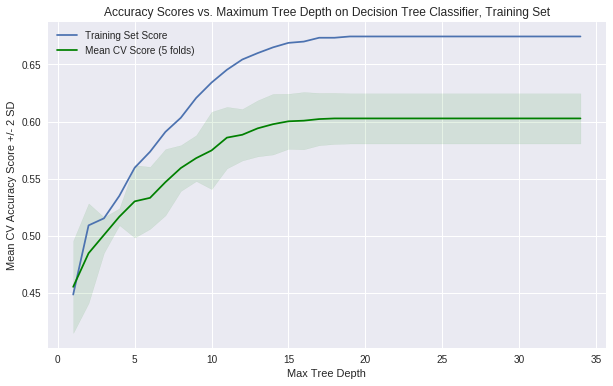

In [0]:
# plot
num_SD = 2 # number of CV std for plotting

plt.figure(figsize =(10,6))
plt.plot(tree_scores_df_om['Depth'], tree_scores_df_om['Train Score'], label='Training Set Score')
plt.plot(tree_scores_df_om['Depth'], tree_scores_df_om['CV Mean Accuracy'],label='Mean CV Score (5 folds)',color='green')
plt.fill_between(
    tree_scores_df_om['Depth'],
    tree_scores_df_om['CV Mean Accuracy'] -  num_SD * tree_scores_df_om['CV std.'],
    tree_scores_df_om['CV Mean Accuracy'] +  num_SD * tree_scores_df_om['CV std.'],
    alpha=.1, color='green')

plt.legend()
plt.xlabel("Max Tree Depth")
plt.ylabel("Mean CV Accuracy Score +/- {} SD".format(num_SD))
plt.title("Accuracy Scores vs. Maximum Tree Depth on Decision Tree Classifier, Training Set");

In [0]:
best_index = tree_scores_df_om['CV Mean Accuracy'].idxmax() 
best_depth = tree_scores_df_om['Depth'][best_index]

tree_clf_om = DecisionTreeClassifier(max_depth=best_depth).fit(x,y)
best_depth

18

## *** Test Set ***

In [0]:
x,y = prepare_data(x_test1,y_test1,result2_std)
ypred_test_om = tree_clf_om.predict(x)
df_pred_tree_test = encoder(ypred_test_om,y_test1,x_test1)
display(df_pred_tree_test.head())
df_pred_tree_test = confusion_matrix_model(tree_clf_om,x,y)
display("conf matrix of Tree of our own model",df_pred_tree_test) 
print("accuracy score for our own model with Decision Tree on test set is:",accuracy_score(ypred_test_om,y))

,Observed,Predicted
0,Russia,Russia
1,Uruguay,Uruguay
2,Iran,Iran
3,Draw,Draw
4,France,France


'conf matrix of Tree of our own model'

,Actual Draw,Actual Team 1,Actual Team 2
Predicted Draw,4,3,6
Predicted Team 1,3,13,5
Predicted Team 2,2,1,11


accuracy score for our own model with Decision Tree on test set is: 0.5833333333333334


# *** LDA and QDA ***

##*** Train set ***

In [0]:
x,y = prepare_data(x_train,y_train,result2_std)
lda_om = LinearDiscriminantAnalysis()
qda_om = QuadraticDiscriminantAnalysis()
lda_om.fit(x, y)
qda_om.fit(x, y)

/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
               store_covariance=False, store_covariances=None, tol=0.0001)

In [0]:
# print("THe CV accurary on LDA is: ", cross_val_score(lda_om, x, y, cv=7).mean())

##*** Test Set ***

In [0]:
x,y = prepare_data(x_test1,y_test1,result2_std)

#lda Test set 1

ypred_test_ldaom = lda_om.predict(x)
df_pred_lda_test = encoder(ypred_test_ldaom,y_test1,x_test1)
display(df_pred_lda_test.head())
df_pred_lda_test = confusion_matrix_model(lda_om,x,y)
display("conf matrix of Tree of our own model",df_pred_tree_test) 
print("accuracy score for our own model with LDA  on test set 1 is:",accuracy_score(ypred_test_ldaom,y))

#lda test set 2
x,y = prepare_data(x_test2,y_test2,result2_std)
ypred_test_ldaom = lda_om.predict(x)
df_pred_lda_test = encoder(ypred_test_ldaom,y_test2,x_test2)
display(df_pred_lda_test.head())
df_pred_lda_test = confusion_matrix_model(lda_om,x,y)
display("conf matrix of Tree of our own model",df_pred_tree_test) 
print("accuracy score for our own model with LDA  on test set 2 is:",accuracy_score(ypred_test_ldaom,y))

# qda Test

x,y = prepare_data(x_test1,y_test1,result2_std)
ypred_test_qdaom = qda_om.predict(x)
df_pred_qda_test = encoder(ypred_test_qdaom,y_test1,x_test1)
display(df_pred_qda_test.head())
df_pred_qda_test = confusion_matrix_model(qda_om,x,y)
display("conf matrix of Tree of our own model",df_pred_tree_test) 
print("accuracy score for our own model with qda  on test set is:",accuracy_score(ypred_test_qdaom,y))

x,y = prepare_data(x_test2,y_test2,result2_std)
ypred_test_qdaom = qda_om.predict(x)
df_pred_qda_test = encoder(ypred_test_qdaom,y_test2,x_test2)
display(df_pred_qda_test.head())
df_pred_qda_test = confusion_matrix_model(qda_om,x,y)
display("conf matrix of Tree of our own model",df_pred_tree_test) 
print("accuracy score for our own model with qda  on test set is:",accuracy_score(ypred_test_qdaom,y))

,Observed,Predicted
0,Russia,Russia
1,Uruguay,Uruguay
2,Iran,Draw
3,Draw,Draw
4,France,France


'conf matrix of Tree of our own model'

,Actual Draw,Actual Team 1,Actual Team 2
Predicted Draw,4,3,6
Predicted Team 1,3,13,5
Predicted Team 2,2,1,11


accuracy score for our own model with LDA  on test set 1 is: 0.4791666666666667


,Observed,Predicted
0,France,France
1,Uruguay,Draw
2,Russia,Spain
3,Croatia,Denmark
4,Brazil,Brazil


'conf matrix of Tree of our own model'

,Actual Draw,Actual Team 1,Actual Team 2
Predicted Draw,4,3,6
Predicted Team 1,3,13,5
Predicted Team 2,2,1,11


accuracy score for our own model with LDA  on test set 2 is: 0.4375


,Observed,Predicted
0,Russia,Russia
1,Uruguay,Uruguay
2,Iran,Iran
3,Draw,Portugal
4,France,Australia


'conf matrix of Tree of our own model'

,Actual Draw,Actual Team 1,Actual Team 2
Predicted Draw,4,3,6
Predicted Team 1,3,13,5
Predicted Team 2,2,1,11


accuracy score for our own model with qda  on test set is: 0.4583333333333333


,Observed,Predicted
0,France,France
1,Uruguay,Draw
2,Russia,Russia
3,Croatia,Denmark
4,Brazil,Brazil


'conf matrix of Tree of our own model'

,Actual Draw,Actual Team 1,Actual Team 2
Predicted Draw,4,3,6
Predicted Team 1,3,13,5
Predicted Team 2,2,1,11


accuracy score for our own model with qda  on test set is: 0.375


#*** Random FOREST  - Own Model***

##*** Train Set ***

In [0]:
# fit the random forest model and get its accuracy score
x,y = prepare_data(x_train,y_train,result2_std)

max_rf_score= 0 
index = 0
for i in range(20):
    model = RandomForestClassifier(n_estimators=100, oob_score=True, max_depth=i+1,random_state=1234)
    model.fit(x, y)
    ypred=model.predict(x)
    if (accuracy_score(ypred,y)) > max_rf_score:
        index = i
        max_rf_score = accuracy_score(ypred,y)
        


In [0]:
# fit the random forest model and get its accuracy score
#x,y = prepare_data(x_train,y_train,result2_std)
rfml_om = RandomForestClassifier(n_estimators=50, oob_score=True, max_depth=12,random_state=1234)
rfml_om.fit(x, y)
ypredml2_om=rfml_om.predict(x)

print("accuracy score for the random forest model:",accuracy_score(ypredml2_om,y))

accuracy score for the random forest model: 0.6745230078563412


##*** Test Set ***

In [0]:
# fit the random forest model and get its accuracy score
x,y = prepare_data(x_test1,y_test1,result2_std)
ypredml2_om=rfml_om.predict(x)

print("accuracy score for the random forest Test model:",accuracy_score(ypredml2_om,y))

accuracy score for the random forest Test model: 0.5208333333333334


#*** Bagging ***

In [0]:
from sklearn.utils import resample


x,y = prepare_data(x_train,y_train,result2_std)
xt1,yt1 = prepare_data(x_test1,y_test1,result2_std)

np.random.seed(0)

N_bootstraps = 100
bagging_train_om = np.zeros((x.shape[0], N_bootstraps),dtype=int)
bagging_test_om = np.zeros((xt1.shape[0], N_bootstraps),dtype=int)
bagging_trees_om = []

simpletree = DecisionTreeClassifier(max_depth=16)

# bootstrapping, saving results each time
for i in range(N_bootstraps):
  boot_xx, boot_y = resample(x, y)
  bagging_trees_om.append(simpletree.fit(boot_xx, boot_y))
  bagging_train_om[:, i] = simpletree.predict(x)
  bagging_test_om[:, i] = simpletree.predict(xt1)

# format table
columns_om = ["Bootstrap-Model_"+str(i+1) for i in range(N_bootstraps)]
rows_train_om = ["Training-Row_" + str(i+1) for i in range(len(x))]
rows_test_om = ["Test-Row_" + str(i+1) for i in range(len(xt1))]

bagging_train_om = pd.DataFrame(bagging_train_om, columns=columns_om, index=rows_train_om)
bagging_test_om = pd.DataFrame(bagging_test_om, columns=columns_om, index=rows_test_om)

print("train bootstrapped table:")
display(bagging_train_om.head())
print("\ntest bootstrapped table:")
display(bagging_test_om.head())


train bootstrapped table:


,Bootstrap-Model_1,Bootstrap-Model_2,Bootstrap-Model_3,Bootstrap-Model_4,Bootstrap-Model_5,Bootstrap-Model_6,Bootstrap-Model_7,Bootstrap-Model_8,Bootstrap-Model_9,Bootstrap-Model_10,...,Bootstrap-Model_91,Bootstrap-Model_92,Bootstrap-Model_93,Bootstrap-Model_94,Bootstrap-Model_95,Bootstrap-Model_96,Bootstrap-Model_97,Bootstrap-Model_98,Bootstrap-Model_99,Bootstrap-Model_100
Training-Row_1,2,2,2,2,2,2,2,2,2,2,...,2,0,0,2,0,0,2,0,2,2
Training-Row_2,0,1,1,1,2,0,0,1,1,0,...,0,0,1,0,1,1,1,2,1,1
Training-Row_3,1,1,1,1,1,1,1,1,1,2,...,1,2,1,2,1,2,1,1,2,2
Training-Row_4,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
Training-Row_5,2,2,2,2,2,2,2,2,2,2,...,0,2,2,2,2,2,2,2,2,2



test bootstrapped table:


,Bootstrap-Model_1,Bootstrap-Model_2,Bootstrap-Model_3,Bootstrap-Model_4,Bootstrap-Model_5,Bootstrap-Model_6,Bootstrap-Model_7,Bootstrap-Model_8,Bootstrap-Model_9,Bootstrap-Model_10,...,Bootstrap-Model_91,Bootstrap-Model_92,Bootstrap-Model_93,Bootstrap-Model_94,Bootstrap-Model_95,Bootstrap-Model_96,Bootstrap-Model_97,Bootstrap-Model_98,Bootstrap-Model_99,Bootstrap-Model_100
Test-Row_1,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Test-Row_2,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
Test-Row_3,2,2,2,2,2,1,2,2,2,2,...,2,2,2,1,2,2,1,2,2,2
Test-Row_4,0,0,0,0,1,0,0,0,2,0,...,1,0,0,2,0,0,0,0,0,0
Test-Row_5,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [0]:
# get majority to generate combined predictions
y_hat_train_maj_om = (np.mean(bagging_train_om,axis=1)>.5).astype(int)
y_hat_test_maj_om = (np.mean(bagging_test_om,axis=1)>.5).astype(int)

bagged_accuracy_train_om = accuracy_score(y, y_hat_train_maj_om)
bagged_accuracy_test_om = accuracy_score(yt1, y_hat_test_maj_om)

print("bagging model, training set accuracy:", bagged_accuracy_train_om)
print("bagging model, test set accuracy:", bagged_accuracy_test_om)

# assertion to verify that bagging model test-set accuracy is at least as good as single depth-4 tree's accuracy
# assert bagged_accuracy_test >= tree4_test_accuracy, "Bagging model test set accuracy too low"


bagging model, training set accuracy: 0.5364758698092031
bagging model, test set accuracy: 0.4375


# Boosting-Our own model

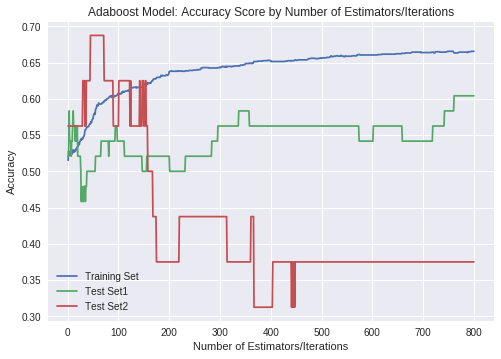

In [0]:
n_estimators = 800
learning_rate = 0.05

x,y = prepare_data(x_train,y_train,result2_std)
ab = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3),
                            n_estimators=n_estimators, learning_rate=learning_rate)
ab.fit(x, y)
xt,yt = prepare_data(x_test1,y_test1,result2_std)
xt2,yt2 = prepare_data(x_test2,y_test2,result2_std)
ab_scores_train = list(ab.staged_score(x, y))
ab_scores_test = list(ab.staged_score(xt, yt))
ab_scores_test2 = list(ab.staged_score(xt2, yt2))

x_plot = range(1, n_estimators+1) # just so we plot x-values of 1-800 instead of 0-799

plt.plot(x_plot, ab_scores_train, label='Training Set')
plt.plot(x_plot, ab_scores_test, label='Test Set1')
plt.plot(x_plot, ab_scores_test2, label='Test Set2')
plt.title('Adaboost Model: Accuracy Score by Number of Estimators/Iterations')
plt.xlabel('Number of Estimators/Iterations')
plt.ylabel('Accuracy')
plt.legend();

In [0]:
# List of lists of the staged predictions
staged_scores_train = []
staged_scores_test = []

for depth in range(1,5):
  ab = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=depth),
                            n_estimators=n_estimators, learning_rate=learning_rate)
  ab.fit(x, y)

  ab_scores_train = list(ab.staged_score(x, y))
  ab_scores_test = list(ab.staged_score(xt, yt))
  
  staged_scores_train.append(ab_scores_train)
  staged_scores_test.append(ab_scores_test)


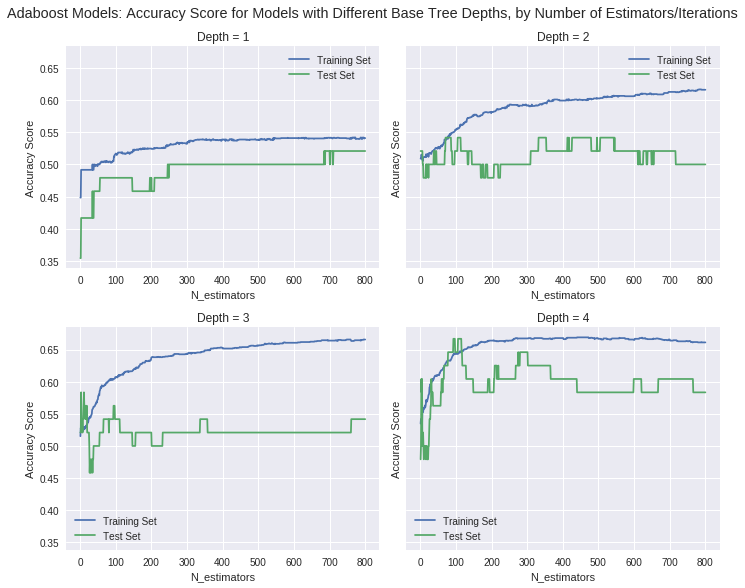

In [0]:
fig, axs = plt.subplots(2,2,figsize=(10,8), sharey=True)

for i, ax in enumerate(axs.ravel()):
  ax.plot(x_plot, staged_scores_train[i], label='Training Set')
  ax.plot(x_plot, staged_scores_test[i], label='Test Set')
  ax.set_title('Depth = {}'.format(i+1))
  ax.set_xlabel('N_estimators')
  ax.set_ylabel('Accuracy Score')
  ax.legend();

plt.tight_layout()
plt.suptitle('Adaboost Models: Accuracy Score for Models with Different Base Tree Depths, \
by Number of Estimators/Iterations', x=.5, y=1.02);

In [0]:
staged_scores_train_array = np.array(staged_scores_train)

for i, depth_scores in enumerate(staged_scores_test_array):
  depth = i+1
  idx = (np.argmax(depth_scores))
  print("Depth = {}: best train set accuracy at {} estimators.".format(depth, idx+1))
  print("train set accuracy score: {}\n".format(depth_scores[idx]))

Depth = 1: best train set accuracy at 1 estimators.
train set accuracy score: 0.6041666666666666

Depth = 2: best train set accuracy at 342 estimators.
train set accuracy score: 0.6041666666666666

Depth = 3: best train set accuracy at 356 estimators.
train set accuracy score: 0.6041666666666666

Depth = 4: best train set accuracy at 739 estimators.
train set accuracy score: 0.6458333333333334



#*** Neural Networks ***

##** Train set  **

In [0]:
x,y = prepare_data(x_train,y_train,result2_std)
y_nn = []
for value in y:
  if value == 0:
    y_nn.append([1,0,0])
  elif value == 1:
    y_nn.append([0,1,0])
  else:
    y_nn.append([0,0,1])

y_nn = np.array(y_nn)

model_nn_om = Sequential([
    Dense(200, input_shape=(x.shape[1],), activation='relu'),
    # Dense(100, activation='relu'),
    # Dense(50, activation='relu'),
    Dropout(0.2),
    Dense(3, activation='linear')
])

#model_nn_om.add(Dropout(0.2))
model_nn_om.compile(loss='mean_absolute_error', 
              optimizer='adam',metrics=['acc'])

model_nn_om.summary()

model_nn_om.fit(x, y_nn, 
          epochs=10*32, 
          batch_size=32, 
          validation_split=.2,
          verbose=False)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 200)               27800     
_________________________________________________________________
dropout_4 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 3)                 603       
Total params: 28,403
Trainable params: 28,403
Non-trainable params: 0
_________________________________________________________________


In [0]:
model_nn_om.evaluate(x, y_nn, verbose=False)[1]

0.6279461280130243

##*** Test Set ***

In [0]:
x,y = prepare_data(x_test1,y_test1,result2_std)
y_nn = []
for value in y:
  if value == 0:
    y_nn.append([1,0,0])
  elif value == 1:
    y_nn.append([0,1,0])
  else:
    y_nn.append([0,0,1])

y_nn = np.array(y_nn)

ypred_proba_nn = model_nn_om.predict(x)

ypred_nn = []
for value in ypred_proba_nn:
  if value[0] == 1:
    ypred_nn.append(0)
  elif value[1] == 1:
    ypred_nn.append(1)
  else:
    ypred_nn.append(2)

ypred_nn = np.array(ypred_nn)
    
print(accuracy_score(ypred_nn,y))


0.4583333333333333


#*** Model Comparison on Accuracies - Own features***

In [0]:
models = [reg2, tree_clf_om,qda_om, KNN2,rfml_om]
labels = ['Logistic Regression' ,'Decision Tree','qda','KNN','Random Forest']
x,y = prepare_data(x_train,y_train,result2_std)
cv_scores = []
for model, label in zip(models, labels):
  cv_score = cross_val_score(model, x, y, scoring='accuracy', cv=7).mean()
  cv_scores.append({'Model': label,
                        'CV_Accuracy': cv_score})

cv_scores.append({'Model': 'Bagging',
                        'CV_Accuracy': bagged_accuracy_train_om})
scores_df = pd.DataFrame(cv_scores, columns=['Model', 'CV_Accuracy'])

scores_df.sort_values(by='CV_Accuracy', ascending=False, inplace=True)
scores_df.reset_index(drop=True, inplace=True)
scores_df.index +=1 # So the indices will be model rankings by score


print("Mean 5-Fold CV Accuracy Score by Model:")

scores_df

/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/usr/local/lib/python3.6/dist-packages/sklearn/discriminan

Mean 5-Fold CV Accuracy Score by Model:


,Model,CV_Accuracy
1,Random Forest,0.597928
2,Decision Tree,0.589507
3,Bagging,0.536476
4,Logistic Regression,0.532831
5,KNN,0.531141
6,qda,0.440778


# Results and comparison between baseline model and our Model

Our analysis of the training set show that random forest is the best model to use for the test set for both the baseline model and the model we developed ourselves

### Baseline Model Test Set Results 

In [0]:
# fit the random forest model and get its accuracy score
x,y = prepare_data(x_train,y_train,result3_std)
rfml = RandomForestClassifier(n_estimators=50, oob_score=True, max_depth=10,random_state=1234)
rfml.fit(x, y)
ypredml2=rfml.predict(x)
print("accuracy score for the random forest model:",accuracy_score(ypredml2,y))

xt1,yt1 = prepare_data(x_test1,y_test1,result3_std)
ypredml2_test1_bl=rfml.predict(xt1)
print("accuracy score for the random forest model:",accuracy_score(ypredml2_test1_bl,yt1))

xt2,yt2 = prepare_data(x_test2,y_test2,result3_std)
ypredml2_test2_bl=knockout_test(rfml,xt2)
print("accuracy score for the random forest model:",accuracy_score(ypredml2_test2_bl,yt2))


accuracy score for the random forest model: 0.6728395061728395
accuracy score for the random forest model: 0.6666666666666666
accuracy score for the random forest model: 0.1875


In [0]:
# fit the random forest model and get its accuracy score
x,y = prepare_data(x_train,y_train,result2_std)
rfml = RandomForestClassifier(n_estimators=50, oob_score=True, max_depth=10,random_state=1234)
rfml.fit(x, y)
ypredml2=rfml.predict(x)
print("accuracy score for the random forest of our model on the train set :",accuracy_score(ypredml2,y))
xt1,yt1 = prepare_data(x_test1,y_test1,result2_std)
ypredml2_test1=rfml.predict(xt1)
print("accuracy score for the random forest model:",accuracy_score(ypredml2_test1,yt1))

xt2,yt2 = prepare_data(x_test2,y_test2,result2_std)
ypredml2_test2=knockout_test(rfml,xt2)
print("accuracy score for the random forest model:",accuracy_score(ypredml2_test2,yt2))



accuracy score for the random forest of our model on the train set : 0.6717171717171717
accuracy score for the random forest model: 0.5625
accuracy score for the random forest model: 0.25


#EDA of our own model data

In [0]:
result2_std.boxplot(column=['Age','# won','Wage','Overall'],figsize=(10,8),
                       grid=True)

NameError: ignored

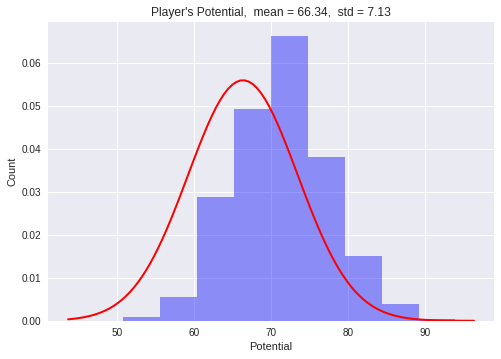

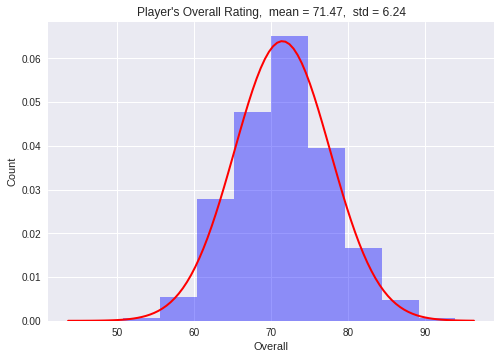

In [0]:
# show players Overall distribution
plt.hist(df1.Potential, bins=10, alpha=0.4,normed=True, color='b')
plt.title("#Players Potential distribution")
plt.xlabel("Potential")
plt.ylabel("Count")
overall_mean = df1_clean.Overall.mean()
overall_std = df1_clean.Overall.std()
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, overall_mean, overall_std)
plt.plot(x, p, 'k', linewidth=2, color='r')
title = "Player's Potential,  mean = %.2f,  std = %.2f" % (overall_mean, overall_std)
plt.title(title)

plt.show()



# show players Overall distribution
plt.hist(df1_clean.Potential, bins=10, alpha=0.4,normed=True, color='b')
plt.title("#Players Overall Rating distribution")
plt.xlabel("Overall")
plt.ylabel("Count")
potential_mean = df1_clean.Potential.mean()
potential_std = df1_clean.Potential.std()
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, potential_mean, potential_std)
plt.plot(x, p, 'k', linewidth=2, color='r')
title = "Player's Overall Rating,  mean = %.2f,  std = %.2f" % (potential_mean, potential_std)
plt.title(title)

plt.show()

Text(0,0.5,'Country')

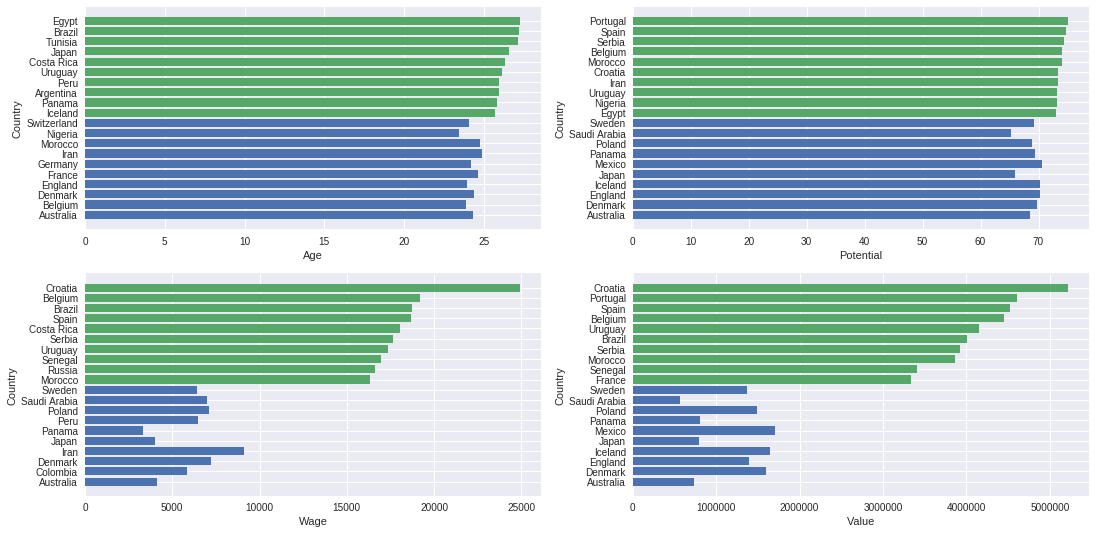

In [0]:
age=df1['Age']
Nationality=df1['Nationality']
playerval=df1.groupby('Club')['Value']
playernationality=df1.groupby('Nationality')['Age']


# n = pd.DataFrame(list(zip(df1['Value'],df1['Club'])))
age_high = result2.Age.sort_values()[:10]
age_low = result2.Age.sort_values()[-10:]

pot_high = result2.Potential.sort_values()[:10]
pot_low = result2.Potential.sort_values()[-10:]

wage_high = result2.Wage.sort_values()[:10]
wage_low = result2.Wage.sort_values()[-10:]

value_high = result2.Value.sort_values()[:10]
value_low = result2.Value.sort_values()[-10:]


plt.figure(figsize = [18,9])
plt.subplot(2,2,1)
agedist=plt.barh(age_high.index,age_high,align='center')
agedist=plt.barh(age_low.index,age_low,align='center')
plt.xlabel('Age')
plt.ylabel('Country')
plt.subplot(2,2,2)
agedist=plt.barh(pot_high.index,pot_high,align='center')
agedist=plt.barh(pot_low.index,pot_low,align='center')
plt.xlabel('Potential')
plt.ylabel('Country')
plt.subplot(2,2,3)
agedist=plt.barh(wage_high.index,wage_high,align='center')
agedist=plt.barh(wage_low.index,wage_low,align='center')
plt.xlabel('Wage')
plt.ylabel('Country')
plt.subplot(2,2,4)
agedist=plt.barh(value_high.index,value_high,align='center')
agedist=plt.barh(value_low.index,value_low,align='center')
plt.xlabel('Value')
plt.ylabel('Country')




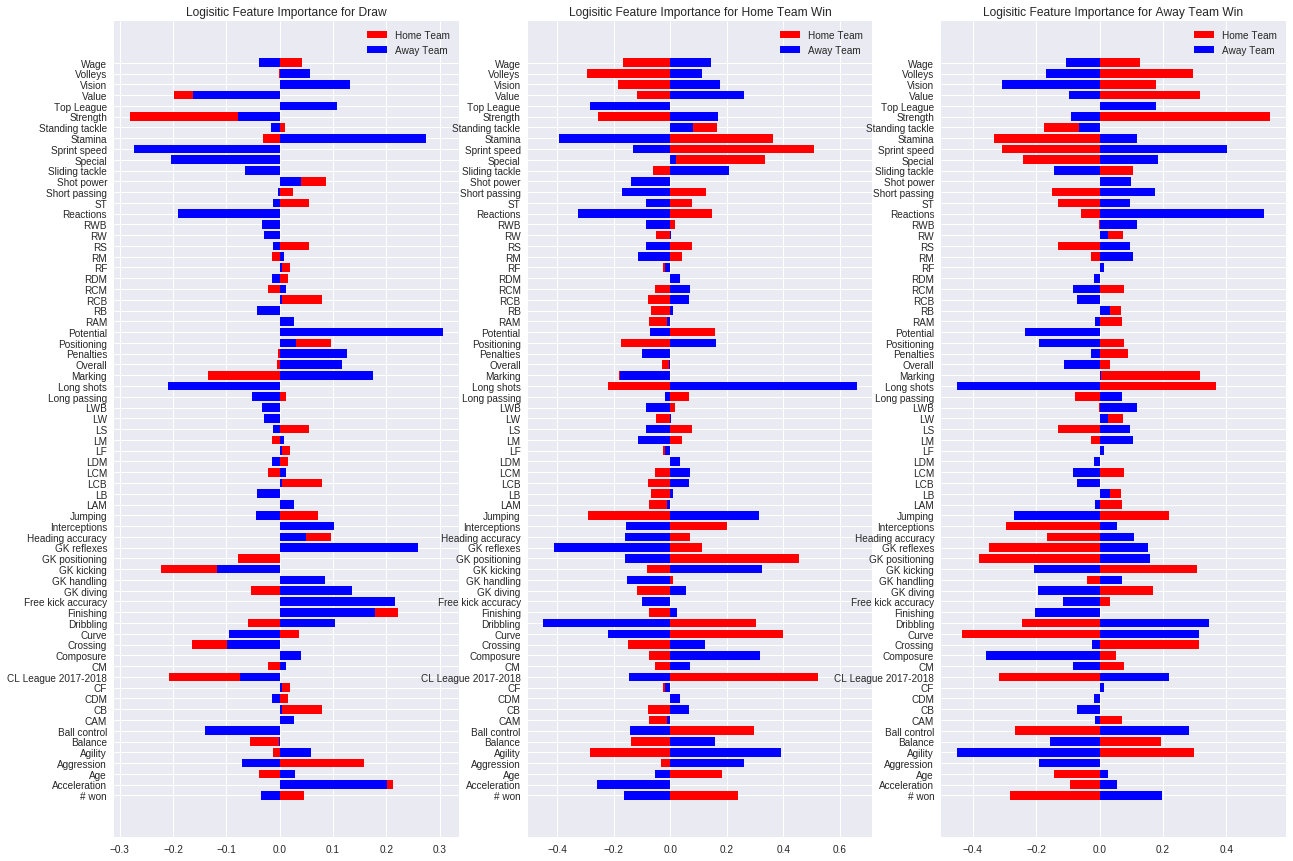

In [0]:
plt.figure(figsize = [21,15])
plt.subplot(1,3,1)
plt.title('Logisitic Feature Importance for Draw')
plt.barh(result2_std.columns,reg2.coef_[0,:69],color='r')
plt.barh(result2_std.columns,reg2.coef_[0,69:],color='b')
plt.legend(['Home Team','Away Team'])
plt.subplot(1,3,2)
plt.title('Logisitic Feature Importance for Home Team Win')
plt.barh(result2_std.columns,reg2.coef_[1,:69],color='r')
plt.barh(result2_std.columns,reg2.coef_[1,69:],color='b')
plt.legend(['Home Team','Away Team'])
plt.subplot(1,3,3)
plt.title('Logisitic Feature Importance for Away Team Win')
plt.barh(result2_std.columns,reg2.coef_[2,:69],color='r')
plt.barh(result2_std.columns,reg2.coef_[2,69:],color='b')
plt.legend(['Home Team','Away Team'])
